### Debbie McMurrick
### DSC530, Final Project

# Data Collection


In [1]:
# importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from itertools import combinations
import seaborn as sns
import warnings as wr
wr.filterwarnings('ignore')

In [2]:
import tabulate
from tabulate import tabulate

# Data for the table: each row is a list with column identifier and description
data = [
    ['tbl', 'Table identifier'],
    ['Year', 'Year of the data record'],
    ['quarter', 'Quarter of the year (1-4)'],
    ['citymarketid_1', 'Origin city market ID'],
    ['citymarketid_2', 'Destination city market ID'],
    ['city1', 'Origin city name'],
    ['city2', 'Destination city name'],
    ['airportid_1', 'Origin airport ID'],
    ['airportid_2', 'Destination airport ID'],
    ['airport_1', 'Origin airport code'],
    ['airport_2', 'Destination airport code'],
    ['nsmiles', 'Distance between airports in miles'],
    ['passengers', 'Number of passengers'],
    ['fare', 'Average fare'],
    ['carrier_lg', 'Code for the largest carrier by passengers'],
    ['large_ms', 'Market share of the largest carrier'],
    ['fare_lg', 'Average fare of the largest carrier'],
    ['carrier_low', 'Code for the lowest fare carrier'],
    ['lf_ms', 'Market share of the lowest fare carrier'],
    ['fare_low', 'Lowest fare'],
    ['Geocoded_City1', 'Geocoded coordinates for the origin city'],
    ['Geocoded_City2', 'Geocoded coordinates for the destination city'],
    ['tbl1apk', 'Unique identifier for the route'],
]

# Convert the data to a Markdown table
markdown_table = tabulate(data, headers=['Column Name', 'Description'], tablefmt='pipe')
print(markdown_table)


| Column Name    | Description                                   |
|:---------------|:----------------------------------------------|
| tbl            | Table identifier                              |
| Year           | Year of the data record                       |
| quarter        | Quarter of the year (1-4)                     |
| citymarketid_1 | Origin city market ID                         |
| citymarketid_2 | Destination city market ID                    |
| city1          | Origin city name                              |
| city2          | Destination city name                         |
| airportid_1    | Origin airport ID                             |
| airportid_2    | Destination airport ID                        |
| airport_1      | Origin airport code                           |
| airport_2      | Destination airport code                      |
| nsmiles        | Distance between airports in miles            |
| passengers     | Number of passengers                       

# Dataset
### This dataset covers airline flight routes, fares, and passenger volumes within the United States from 1993 to 2024. It includes metrics like airport distances, passenger numbers, and fare data by airline carriers. The goal of this project is to predict average fares on specific routes, offering valuable insights into airline pricing strategies and passenger behavior.

# Questions

#### 1. What variables impact finding the lowest fare for an airline ticket? (look at nsmiles, passengers, airport_1, airport_2)
#### 2. Are there particular routes that are more / least expensive? (use airport_1 and airport_2 to analyze fare)
#### 3. Are airfares higher in certain times of the year? (use year, quarter, fare)
#### 4. What destination airport has the highest / lowest fares?


In [7]:
import warnings
warnings.filterwarnings("ignore")

# Dataset Description
# The dataset contains information on flight searches, including details such as search date, departure date, departure and arrival airports, number of stops, airline, cabin class, and price.

# Load the libraries and dataset
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor


In [8]:
flights = pd.read_csv("/Users/dmcmurrick/Downloads/US Airline Flight Routes and Fares 1993-2024.csv")
data = flights.copy()
data.head()

tbl  Year  quarter  citymarketid_1  citymarketid_2  \
0  Table1a  2021        3           30135           33195   
1  Table1a  2021        3           30135           33195   
2  Table1a  2021        3           30140           30194   
3  Table1a  2021        3           30140           30194   
4  Table1a  2021        3           30140           30466   

                            city1                          city2  airportid_1  \
0  Allentown/Bethlehem/Easton, PA  Tampa, FL (Metropolitan Area)        10135   
1  Allentown/Bethlehem/Easton, PA  Tampa, FL (Metropolitan Area)        10135   
2                 Albuquerque, NM          Dallas/Fort Worth, TX        10140   
3                 Albuquerque, NM          Dallas/Fort Worth, TX        10140   
4                 Albuquerque, NM                    Phoenix, AZ        10140   

   airportid_2 airport_1  ...    fare  carrier_lg  large_ms  fare_lg  \
0        14112       ABE  ...   81.43          G4    1.0000    81.43   
1        15304       ABE  ...  208.93          DL    0.4659   219.98   
2        11259       ABQ  ...  184.56          WN    0.9968   184.44   
3        11298       ABQ  ...  182.64          AA    0.9774   183.09   
4        14107       ABQ  ...  177.11          WN    0.6061   184.49   

  carrier_low   lf_ms  fare_low Geocoded_City1  Geocoded_City2  \
0          G4  1.0000     81.43            NaN             NaN   
1          UA  0.1193    154.11            NaN             NaN   
2          WN  0.9968    184.44            NaN             NaN   
3          AA  0.9774    183.09            NaN             NaN   
4          AA  0.3939    165.77            NaN             NaN   

                 tbl1apk  
0  202131013514112ABEPIE  
1  202131013515304ABETPA  
2  202131014011259ABQDAL  
3  202131014011298ABQDFW  
4  202131014014107ABQPHX  

[5 rows x 23 columns]

### Include the other descriptive characteristics about the variables: Mean, Mode, Spread, and Tails (Chapter 2).

In [12]:
# describing the data
data.describe().T

count          mean          std         min        25%  \
Year            245955.0   2008.524124     8.703364   1993.0000   2001.000   
quarter         245955.0      2.479153     1.122149      1.0000      1.000   
citymarketid_1  245955.0  31556.430201  1089.872880  30135.0000  30721.000   
citymarketid_2  245955.0  32180.117086  1232.464184  30189.0000  30994.000   
airportid_1     245955.0  12437.099986  1431.665257  10135.0000  11193.000   
airportid_2     245955.0  13249.889525  1425.810159  10466.0000  12197.000   
nsmiles         245955.0   1189.812319   703.143472    109.0000    626.000   
passengers      245955.0    299.476795   511.389486      0.0000     21.000   
fare            245955.0    218.979587    82.372486     50.0000    164.620   
large_ms        244415.0      0.665252     0.224635      0.0038      0.480   
fare_lg         244415.0    218.710963    84.674363     50.0000    161.500   
lf_ms           244343.0      0.450438     0.332669      0.0100      0.158   
fare_low        244343.0    190.675939    73.577694     50.0000    140.060   

                       50%         75%      max  
Year             2008.0000   2016.0000   2024.0  
quarter             2.0000      3.0000      4.0  
citymarketid_1  31423.0000  32467.0000  35412.0  
citymarketid_2  32211.0000  33192.0000  35628.0  
airportid_1     12266.0000  13487.0000  16440.0  
airportid_2     13303.0000  14679.0000  15919.0  
nsmiles          1023.0000   1736.0000   2724.0  
passengers        113.0000    339.0000   8301.0  
fare              209.3200    262.8900   3377.0  
large_ms            0.6524      0.8719      1.0  
fare_lg           208.0300    263.6400   2725.6  
lf_ms               0.3600      0.7500      1.0  
fare_low          181.6300    230.0400   2725.6

In [14]:
# List of fields to describe
fields_to_describe = ['Year', 'fare', 'fare_low', 'fare_lg', 'nsmiles', 'passengers']

# Get basic summary statistics
summary = data[fields_to_describe].describe().T

# Add Mode
summary['mode'] = data[fields_to_describe].mode().iloc[0]

# Add Spread (Range = max - min)
summary['spread'] = summary['max'] - summary['min']

# Add Tails (1st and 99th percentiles)
summary['tail_1%'] = data[fields_to_describe].quantile(0.01)
summary['tail_99%'] = data[fields_to_describe].quantile(0.99)

# Show the updated summary
summary


count         mean         std     min      25%      50%  \
Year        245955.0  2008.524124    8.703364  1993.0  2001.00  2008.00   
fare        245955.0   218.979587   82.372486    50.0   164.62   209.32   
fare_low    244343.0   190.675939   73.577694    50.0   140.06   181.63   
fare_lg     244415.0   218.710963   84.674363    50.0   161.50   208.03   
nsmiles     245955.0  1189.812319  703.143472   109.0   626.00  1023.00   
passengers  245955.0   299.476795  511.389486     0.0    21.00   113.00   

                75%     max    mode  spread  tail_1%   tail_99%  
Year        2016.00  2024.0  1993.0    31.0  1993.00  2023.0000  
fare         262.89  3377.0   209.0  3327.0    78.91   456.5376  
fare_low     230.04  2725.6   178.0  2675.6    73.77   411.3532  
fare_lg      263.64  2725.6   171.0  2675.6    77.23   470.4216  
nsmiles     1736.00  2724.0  2510.0  2615.0   200.00  2619.0000  
passengers   339.00  8301.0     1.0  8301.0     0.00  2481.0000

In [16]:
data.shape

(245955, 23)

In [18]:
data_types = flights.dtypes
print(data_types)

tbl                object
Year                int64
quarter             int64
citymarketid_1      int64
citymarketid_2      int64
city1              object
city2              object
airportid_1         int64
airportid_2         int64
airport_1          object
airport_2          object
nsmiles             int64
passengers          int64
fare              float64
carrier_lg         object
large_ms          float64
fare_lg           float64
carrier_low        object
lf_ms             float64
fare_low          float64
Geocoded_City1     object
Geocoded_City2     object
tbl1apk            object
dtype: object


# Exploratory Data Analysis for Final Project

In [21]:
# Check for missing values:
data.isnull().sum()

tbl                   0
Year                  0
quarter               0
citymarketid_1        0
citymarketid_2        0
city1                 0
city2                 0
airportid_1           0
airportid_2           0
airport_1             0
airport_2             0
nsmiles               0
passengers            0
fare                  0
carrier_lg         1540
large_ms           1540
fare_lg            1540
carrier_low        1612
lf_ms              1612
fare_low           1612
Geocoded_City1    39206
Geocoded_City2    39206
tbl1apk               0
dtype: int64

In [23]:
# Checking duplicate values 
data.nunique()

tbl                    2
Year                  31
quarter                4
citymarketid_1       141
citymarketid_2       128
city1                141
city2                128
airportid_1          188
airportid_2          173
airport_1            187
airport_2            173
nsmiles             1155
passengers          3883
fare               36323
carrier_lg            67
large_ms            7367
fare_lg            37508
carrier_low           71
lf_ms               9687
fare_low           32283
Geocoded_City1       238
Geocoded_City2       207
tbl1apk           245955
dtype: int64

### Include a histogram of each of the 5 variables – in your summary and analysis, identify any outliers and explain the reasoning for them being outliers and how you believe they should be handled (Chapter 2).

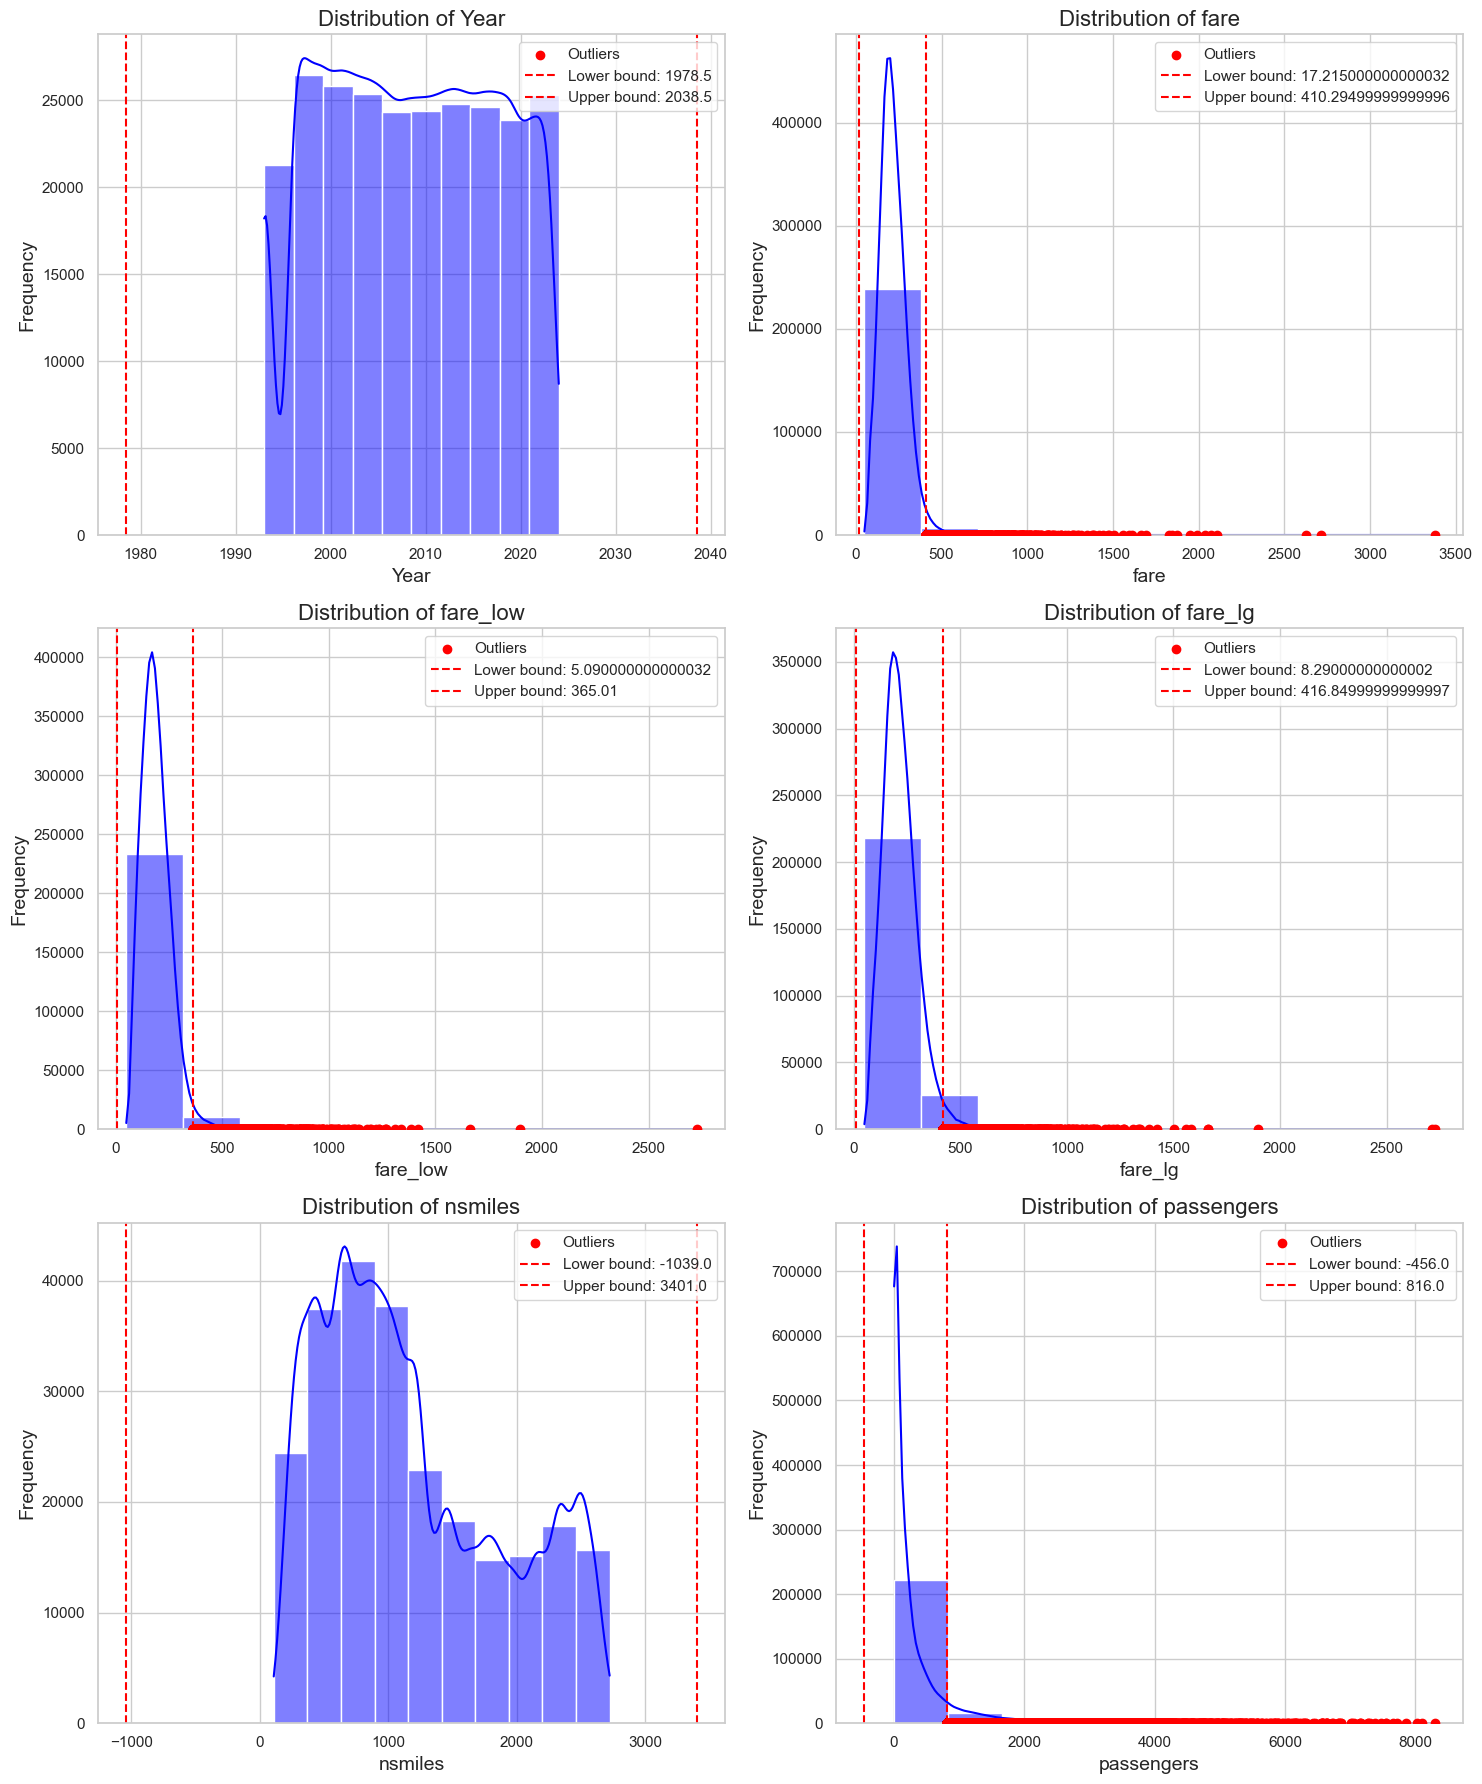

Number of outliers in 'Year': 0
Number of outliers in 'fare': 4757
Number of outliers in 'fare_low': 4685
Number of outliers in 'fare_lg': 5337
Number of outliers in 'nsmiles': 0
Number of outliers in 'passengers': 24480


In [28]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Set the style of seaborn
sns.set(style="whitegrid")

# Identify outliers using IQR for any column
def find_outliers(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return data[(data[column] < lower_bound) | (data[column] > upper_bound)], lower_bound, upper_bound

# Fields to plot
fields = ['Year', 'fare', 'fare_low', 'fare_lg', 'nsmiles', 'passengers']

# Create subplots (3 rows, 2 columns for 6 fields)
fig, axes = plt.subplots(3, 2, figsize=(15, 18))

# Iterate over each field and plot
for i, field in enumerate(fields):
    row, col = divmod(i, 2)  # Calculate row and column for subplot
    # Find outliers for the current field
    outliers, lower_bound, upper_bound = find_outliers(data, field)
    
    # Plot histogram for the current field
    sns.histplot(data[field], bins=10, kde=True, ax=axes[row, col], color='blue')
    axes[row, col].set_title(f'Distribution of {field}', fontsize=16)
    axes[row, col].set_xlabel(field, fontsize=14)
    axes[row, col].set_ylabel('Frequency', fontsize=14)

    # Highlight outliers
    axes[row, col].scatter(outliers[field], np.zeros(len(outliers)), color='red', label='Outliers', zorder=5)
    axes[row, col].axvline(lower_bound, color='red', linestyle='--', label=f'Lower bound: {lower_bound}')
    axes[row, col].axvline(upper_bound, color='red', linestyle='--', label=f'Upper bound: {upper_bound}')
    
    # Show legend for the outliers
    axes[row, col].legend()

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

# Summary and analysis
# Output the count of outliers for each field
for field in fields:
    outliers, _, _ = find_outliers(data, field)
    outlier_count = len(outliers)  # Count the number of outliers
    print(f"Number of outliers in '{field}': {outlier_count}")


# You can decide how to handle outliers here, for example:
# - Remove them
# - Transform the data (e.g., log transformation)
# - Use robust statistical methods


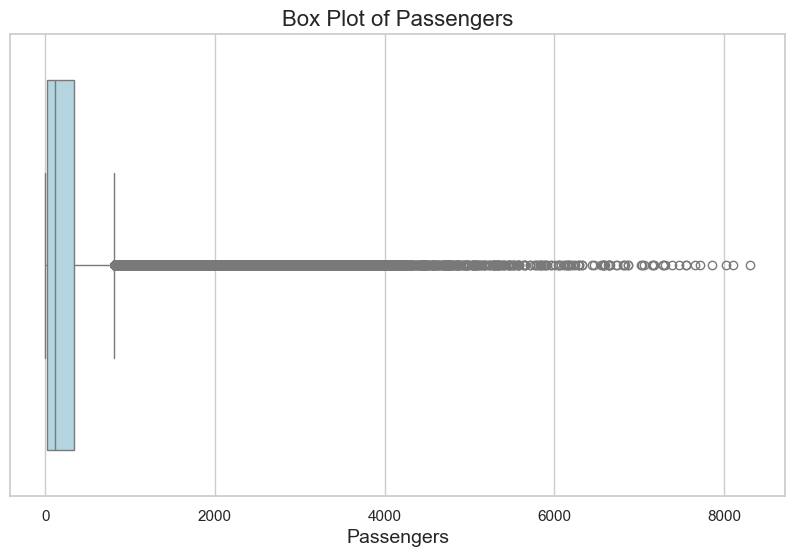

In [32]:
# Identify outliers
import seaborn as sns
import matplotlib.pyplot as plt

# Set the style of seaborn
sns.set(style="whitegrid")

# Create a box plot for fare_low
plt.figure(figsize=(10, 6))
sns.boxplot(x=data['passengers'], color='lightblue')

# Set title and labels
plt.title('Box Plot of Passengers', fontsize=16)
plt.xlabel('Passengers', fontsize=14)

# Show the plot
plt.show()


In [47]:
# Example: Check outliers and other variables
outlier_info = outliers[['fare', 'passengers', 'Year']]  # Adjust based on your dataset columns
print(outlier_info)



          fare  passengers  Year
20      427.50           0  2021
384     422.33           1  2021
422     610.00           0  2021
578     491.50           0  2021
621     416.56          12  2021
...        ...         ...   ...
245698  611.50           0  2024
245700  540.32          34  2024
245907  598.00           0  2024
245927  415.03         506  2024
245928  430.66         272  2024

[4757 rows x 3 columns]


### Analysis of Outliers
##### Above we can see the outliers for fare_low as the dots outside of the "whiskers" of the box plot are considered outliers. These are all higher rates so they could be attributed to pricing errors that were incorrectly entered, market variability, or luxury services. Market variability could come into play, where certain routes may have highly variable pricing due to demand fluctuations, time of booking, or special events (e.g., holidays or major events in the destination city). Additionally, some of the outliers could be due to luxury services that represent premium services or charter flights that charge significantly higher fares compared to standard economy tickets. 

##### We could remove the luxury service brands and/or international airlines. 

In [50]:
import pandas as pd

# Group by carrier and get the minimum fare_low and maximum fare for each carrier
highest_fare_carriers = data.groupby('carrier_lg').agg(
    min_fare_low=('fare_low', 'min'),
    max_fare=('fare', 'max')
).reset_index()

# Sort the results by both fare_low and fare
highest_fare_carriers = highest_fare_carriers.sort_values(by=['min_fare_low', 'max_fare'], ascending=False)

# Display the top carriers with the highest fare_low and fare
print(highest_fare_carriers.head(500))  # Change 500 to however many you want to see


   carrier_lg  min_fare_low  max_fare
2          9K        205.90    404.50
45         T3        201.05    219.98
59         XJ        180.00    180.44
25         LC        149.22    336.07
41         RP        136.37    271.26
..        ...           ...       ...
9          CO         50.80   1154.14
4          AA         50.40   3377.00
51         UA         50.40   1383.40
53         US         50.10   1312.00
57         WN         50.00    987.90

[67 rows x 3 columns]


In [52]:
# Identify outliers using IQR

Q1 = data['fare'].quantile(0.25)
Q3 = data['fare'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter out the outliers based on the IQR method
data_no_outliers = data[(data['fare'] >= lower_bound) & (data['fare'] <= upper_bound)]


In [62]:
# Identify outliers and remove them for multiple fields using IQR

fields_to_check = ['Year', 'fare', 'fare_low', 'fare_lg', 'nsmiles', 'passengers']

# Initialize a new DataFrame to store the cleaned data (without outliers)
data_no_outliers = data.copy()

for field in fields_to_check:
    # Calculate Q1, Q3, and IQR for each field
    Q1 = data_no_outliers[field].quantile(0.25)
    Q3 = data_no_outliers[field].quantile(0.75)
    IQR = Q3 - Q1
    
    # Calculate lower and upper bounds
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Filter out the outliers based on the IQR method for each field
    data_no_outliers = data_no_outliers[(data_no_outliers[field] >= lower_bound) & (data_no_outliers[field] <= upper_bound)]

# The data_no_outliers DataFrame now contains the dataset with outliers removed for all the specified fields

print(f"Original data shape: {data.shape}")
print(f"Cleaned data shape (without outliers): {data_no_outliers.shape}")


Original data shape: (245955, 23)
Cleaned data shape (without outliers): (212576, 23)


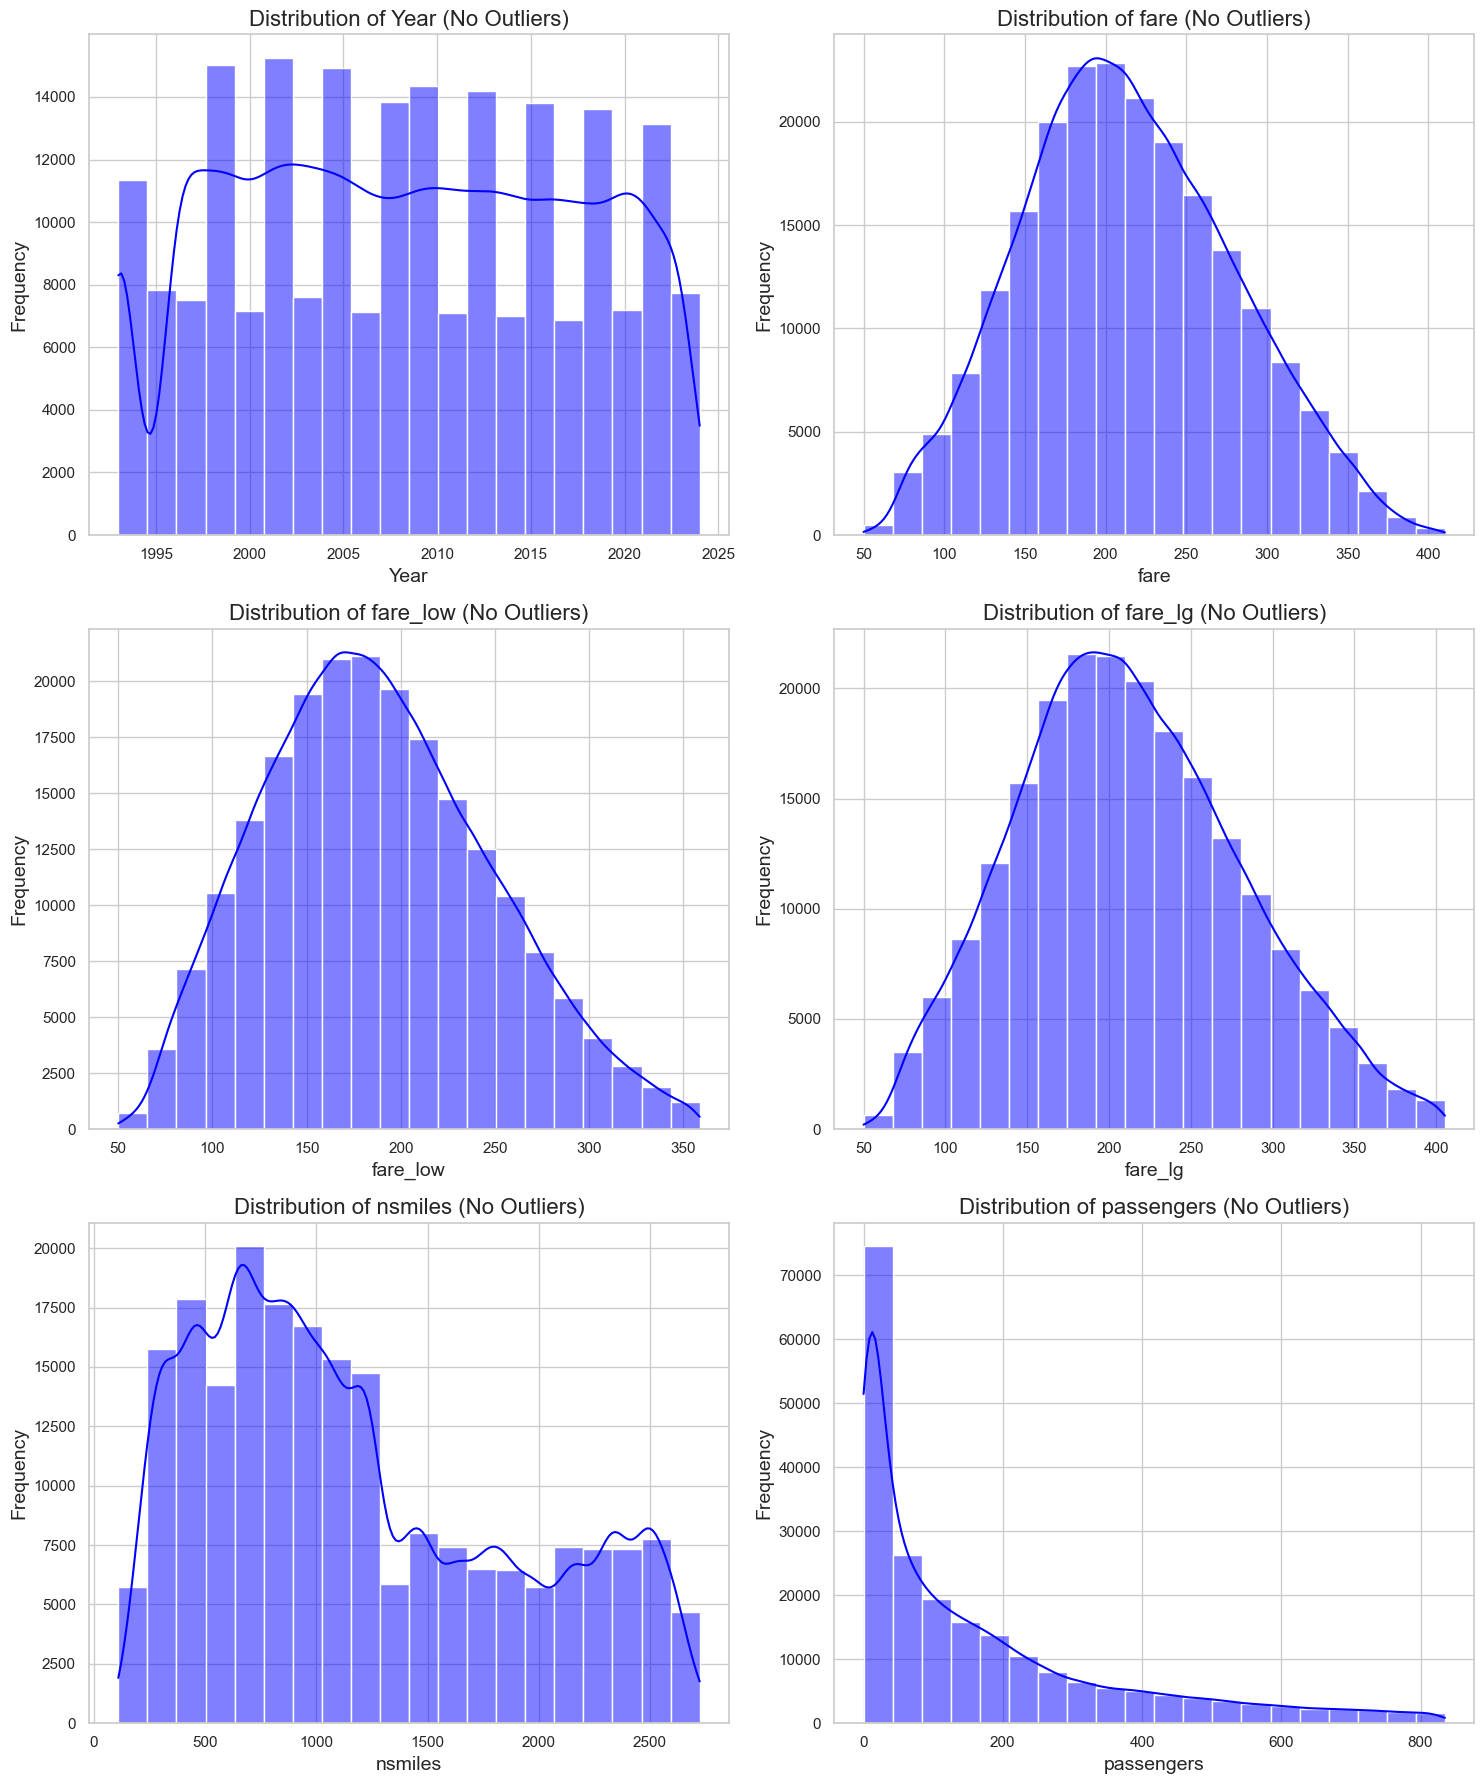

In [64]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the style of seaborn
sns.set(style="whitegrid")

# Fields to plot after removing outliers
fields_to_plot = ['Year', 'fare', 'fare_low', 'fare_lg', 'nsmiles', 'passengers']

# Create subplots (3 rows, 2 columns for 6 fields)
fig, axes = plt.subplots(3, 2, figsize=(15, 18))

# Iterate over each field and plot its histogram
for i, field in enumerate(fields_to_plot):
    row, col = divmod(i, 2)  # Calculate row and column for subplot
    
    # Plot histogram for the current field in the cleaned data (data_no_outliers)
    sns.histplot(data_no_outliers[field], bins=20, kde=True, ax=axes[row, col], color='blue')
    axes[row, col].set_title(f'Distribution of {field} (No Outliers)', fontsize=16)
    axes[row, col].set_xlabel(field, fontsize=14)
    axes[row, col].set_ylabel('Frequency', fontsize=14)

# Adjust layout for a cleaner display
plt.tight_layout()

# Show the plot
plt.show()


In [66]:
print(data['Year'].value_counts())


Year
1993    9739
1996    9081
1997    8949
1999    8757
1998    8708
2001    8648
2002    8589
2000    8541
2003    8488
2004    8466
2005    8365
2013    8301
2012    8238
2017    8232
2014    8229
2016    8227
2006    8200
2018    8195
2015    8150
2019    8148
2011    8144
2010    8113
2009    8109
2008    8107
2007    7997
2022    7809
2023    7788
2021    7758
2020    7520
1994    2454
2024    1905
Name: count, dtype: int64


In [68]:
print(data_no_outliers['Year'].value_counts())


Year
1993    9127
1996    7818
2002    7696
2003    7614
2001    7540
2004    7531
1998    7530
1997    7502
1999    7494
2005    7408
2020    7196
2010    7182
2000    7164
2009    7152
2006    7117
2013    7113
2011    7102
2012    7080
2014    7004
2021    6998
2016    6963
2008    6928
2007    6901
2017    6882
2015    6854
2018    6834
2019    6777
2023    6208
2022    6132
1994    2214
2024    1515
Name: count, dtype: int64


### Using pg. 29 of your text as an example, compare two scenarios in your data using a PMF. Reminder, this isn’t comparing two variables against each other – it is the same variable, but a different scenario. Almost like a filter. The example in the book is first babies compared to all other babies, it is still the same variable, but breaking the data out based on criteria we are exploring (Chapter 3).

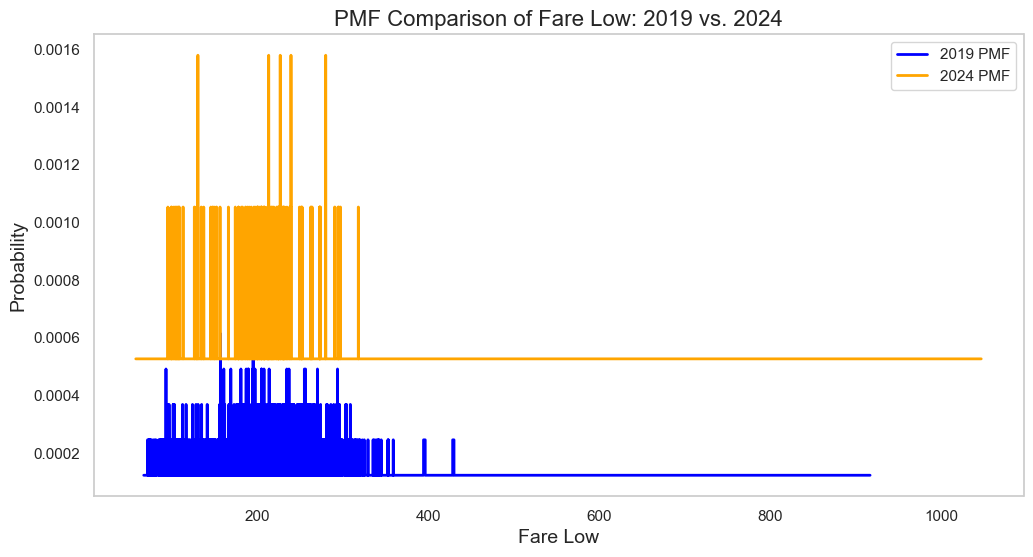

In [75]:
# PMF to compare fare_low in 2019 to 2014 (5 year period, and excludes COVID impact).

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Using 'data' for DataFrame and has a 'Year' column
# Filter data for 2019 and 2024
data_2019 = data[data['Year'] == 2019]['fare_low']
data_2024 = data[data['Year'] == 2024]['fare_low']

# Calculate PMF for 2019 fares
pmf_2019 = data_2019.value_counts(normalize=True).sort_index()
pmf_values_2019 = pmf_2019.values
pmf_indices_2019 = pmf_2019.index

# Calculate PMF for 2024 fares
pmf_2024 = data_2024.value_counts(normalize=True).sort_index()
pmf_values_2024 = pmf_2024.values
pmf_indices_2024 = pmf_2024.index

# Plot the PMFs
plt.figure(figsize=(12, 6))
plt.step(pmf_indices_2019, pmf_values_2019, where='mid', label='2019 PMF', color='blue', linewidth=2)
plt.step(pmf_indices_2024, pmf_values_2024, where='mid', label='2024 PMF', color='orange', linewidth=2)

# Set title and labels
plt.title('PMF Comparison of Fare Low: 2019 vs. 2024', fontsize=16)
plt.xlabel('Fare Low', fontsize=14)
plt.ylabel('Probability', fontsize=14)
plt.legend()
plt.grid()

# Show the plot
plt.show()


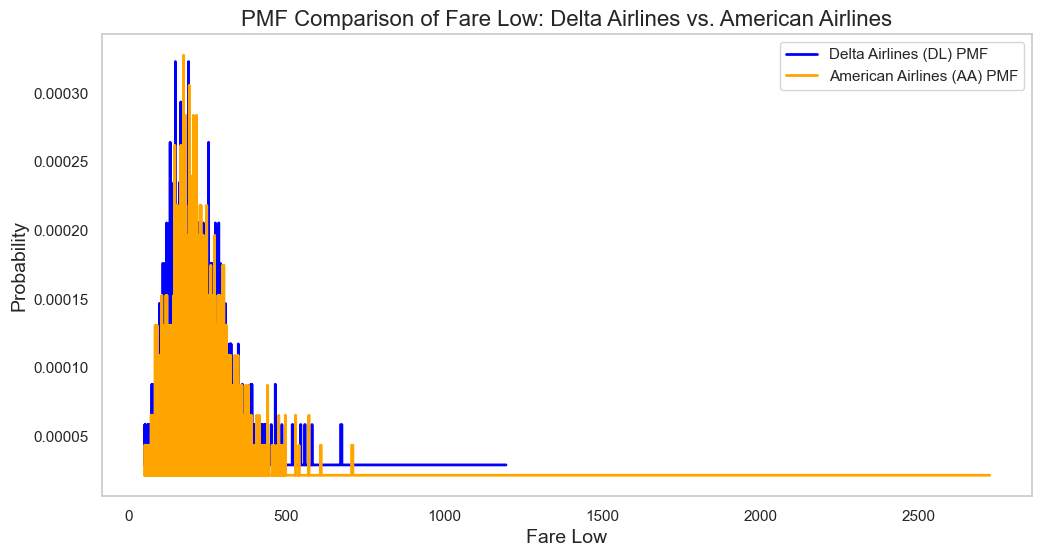

In [77]:
# Compare fare_low from Delta Airlines (DL) and American Airlines (AA). 
# Allows us to visualize and compare the distribution of fare_low from Delta and American flights. 

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Using 'data' for DataFrame and has 'carrier_lg' and 'fare_low' columns
# Filter data for carriers 'DL' and 'AA'
data_DL = data[data['carrier_lg'] == 'DL']['fare_low']
data_AA = data[data['carrier_lg'] == 'AA']['fare_low']

# Calculate PMF for Delta Airlines (DL) fares
pmf_DL = data_DL.value_counts(normalize=True).sort_index()
pmf_values_DL = pmf_DL.values
pmf_indices_DL = pmf_DL.index

# Calculate PMF for American Airlines (AA) fares
pmf_AA = data_AA.value_counts(normalize=True).sort_index()
pmf_values_AA = pmf_AA.values
pmf_indices_AA = pmf_AA.index

# Plot the PMFs
plt.figure(figsize=(12, 6))
plt.step(pmf_indices_DL, pmf_values_DL, where='mid', label='Delta Airlines (DL) PMF', color='blue', linewidth=2)
plt.step(pmf_indices_AA, pmf_values_AA, where='mid', label='American Airlines (AA) PMF', color='orange', linewidth=2)

# Set title and labels
plt.title('PMF Comparison of Fare Low: Delta Airlines vs. American Airlines', fontsize=16)
plt.xlabel('Fare Low', fontsize=14)
plt.ylabel('Probability', fontsize=14)
plt.legend()
plt.grid()

# Show the plot
plt.show()


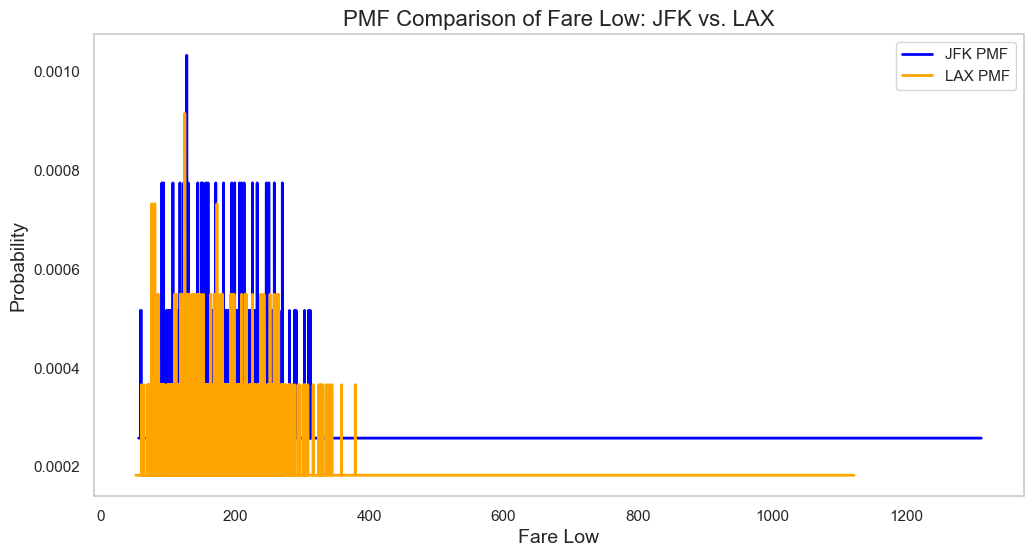

In [79]:
# Compare fare_low from JFK and LAX. 
# Allows us to visualize and compare the distribution of fare_low for flights originating from JFK and LAX. 

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'data' is your DataFrame and has 'airport_1' and 'fare_low' columns
# Filter data for airports JFK and LAX
data_JFK = data[data['airport_1'] == 'JFK']['fare_low']
data_LAX = data[data['airport_1'] == 'LAX']['fare_low']

# Calculate PMF for JFK fares
pmf_JFK = data_JFK.value_counts(normalize=True).sort_index()
pmf_values_JFK = pmf_JFK.values
pmf_indices_JFK = pmf_JFK.index

# Calculate PMF for LAX fares
pmf_LAX = data_LAX.value_counts(normalize=True).sort_index()
pmf_values_LAX = pmf_LAX.values
pmf_indices_LAX = pmf_LAX.index

# Plot the PMFs
plt.figure(figsize=(12, 6))
plt.step(pmf_indices_JFK, pmf_values_JFK, where='mid', label='JFK PMF', color='blue', linewidth=2)
plt.step(pmf_indices_LAX, pmf_values_LAX, where='mid', label='LAX PMF', color='orange', linewidth=2)

# Set title and labels
plt.title('PMF Comparison of Fare Low: JFK vs. LAX', fontsize=16)
plt.xlabel('Fare Low', fontsize=14)
plt.ylabel('Probability', fontsize=14)
plt.legend()
plt.grid()

# Show the plot
plt.show()


### Create 1 CDF with one of your variables, using page 41-44 as your guide, what does this tell you about your variable and how does it address the question you are trying to answer (Chapter 4).

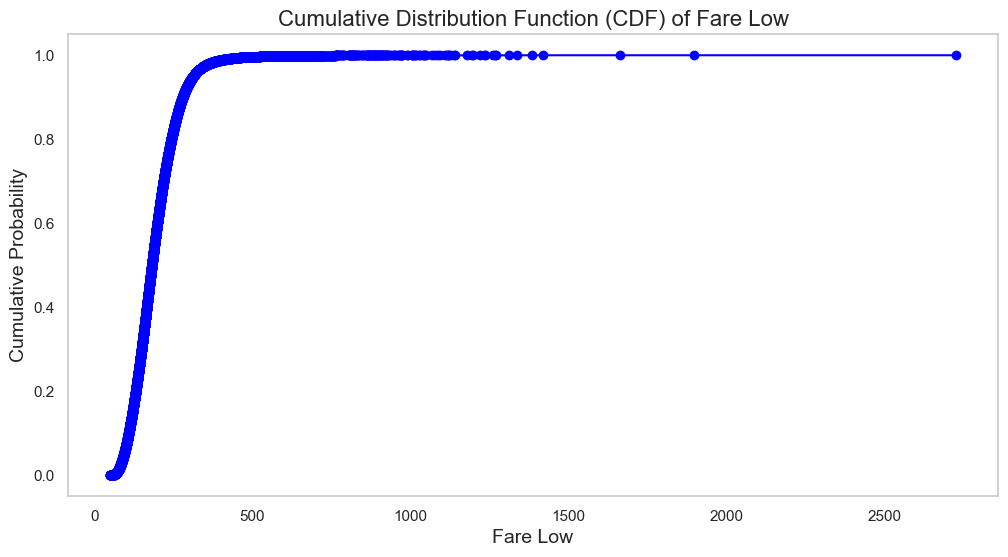

In [82]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Remove any NaN values for accurate CDF calculation
data_cleaned = data['fare_low'].dropna()

# Calculate the CDF for fare_low
# fare_counts is sorted by index, so we can directly plot the CDF using the cumulative values.
fare_counts = data_cleaned.value_counts().sort_index()
cdf_values = fare_counts.cumsum() / fare_counts.sum()

# Create the fare values for the x-axis
fare_indices = fare_counts.index

# Plot the CDF
plt.figure(figsize=(12, 6))
plt.plot(fare_indices, cdf_values, marker='o', linestyle='-', color='blue')
plt.title('Cumulative Distribution Function (CDF) of Fare Low', fontsize=16)
plt.xlabel('Fare Low', fontsize=14)
plt.ylabel('Cumulative Probability', fontsize=14)
plt.grid()

# Show the plot
plt.show()


### CDF Analysis
##### The CDF graph provides a clear representation of how fares accumulate. 
##### This shows that most flights are below $500 but we can still see some outliers at the top with higher prices.

### Plot 1 analytical distribution and provide your analysis on how it applies to the dataset you have chosen.

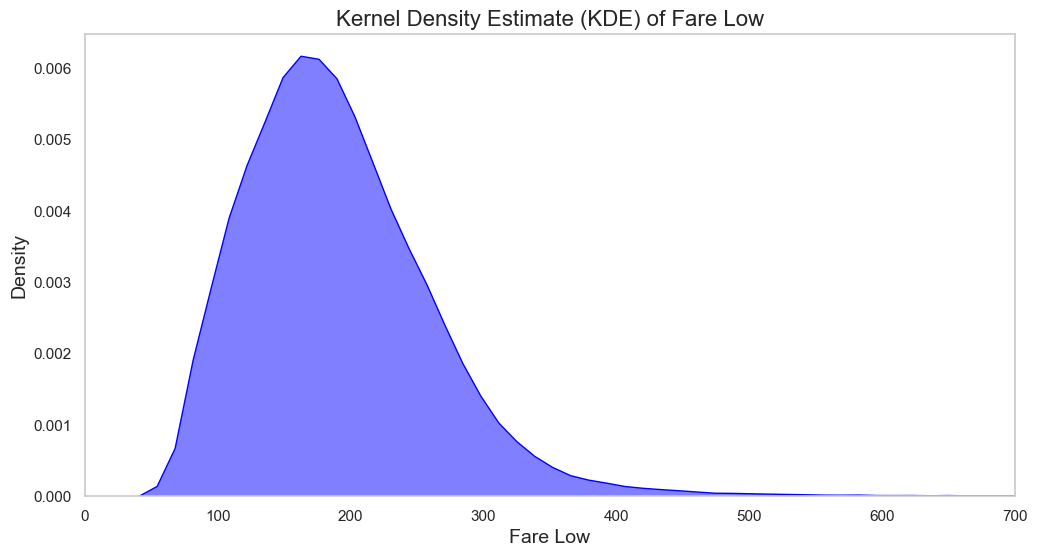

In [88]:
# Plot the KDE for fare_low 
# Given that fare data often has a skewed distribution rather than a perfect normal distribution, a KDE can provide a smooth representation of the data.

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Using DataFrame called 'data' and contains the 'fare_low' column
# Remove any NaN values for accurate plotting
data_cleaned = data['fare_low'].dropna()

# Set the style of seaborn
sns.set(style="whitegrid")

# Plot the KDE for fare_low
plt.figure(figsize=(12, 6))
sns.kdeplot(data_cleaned, fill=True, color='blue', alpha=0.5, bw_adjust=0.5)
plt.title('Kernel Density Estimate (KDE) of Fare Low', fontsize=16)
plt.xlabel('Fare Low', fontsize=14)
plt.ylabel('Density', fontsize=14)

# Set x-axis limits
plt.xlim(0, 700)

plt.grid()

# Show the plot
plt.show()


### Analysis of KDE 
##### The KDE will provide a smooth curve that represents the probability density of the fare prices. Peaks in the KDE indicate the most common fare prices, while valleys suggest less common fare prices. The KDE plot of fare_low allows for a deeper understanding of the fare distribution within the dataset. It provides valuable insights into pricing strategies, market segmentation, and customer targeting for airlines or travel agencies. 
##### The distribution is skewed to the left, which suggests that while most fares are lower, there are some high-priced outliers (luxury flights).
##### This graph shows that a significant peak around $180 fare price, it indicates that a large number of flights are priced within this range. This suggests a competitive market segment where airlines are targeting budget-conscious travelers.

### Create two scatter plots comparing two variables and provide your analysis on correlation and causation. Remember, covariance, Pearson’s correlation, and Non-Linear Relationships should also be considered during your analysis 

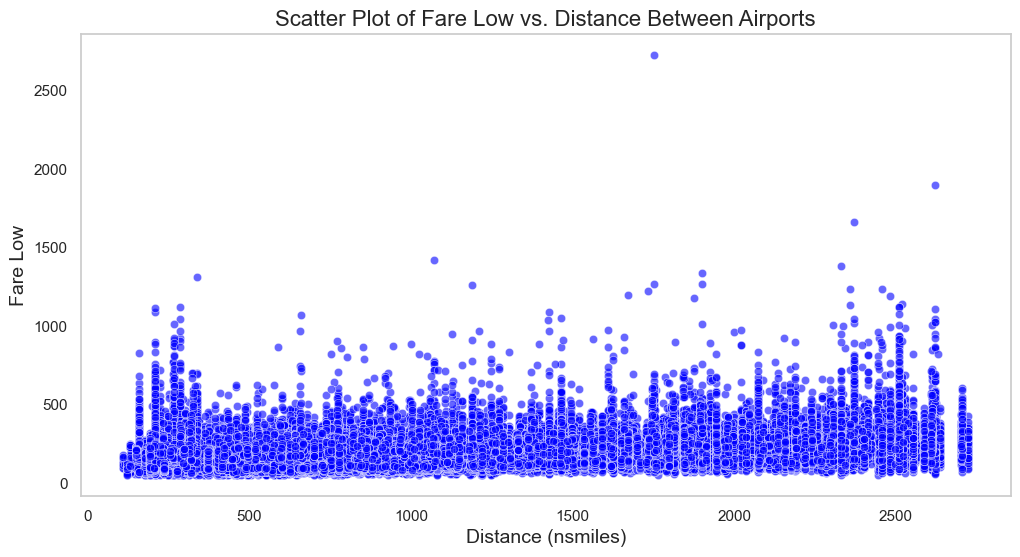

Pearson's Correlation Coefficient: 0.4167110795912751


In [91]:
# Scatterplot comparing 'fare_low' and 'nsmiles'.
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Uses 'Data' DataFrame and contains the relevant columns
# Clean the data by dropping NaN values
data_cleaned = data[['fare_low', 'nsmiles']].dropna()

# Set the style of seaborn
sns.set(style="whitegrid")

# Create a scatter plot for fare_low vs nsmiles
plt.figure(figsize=(12, 6))
sns.scatterplot(x='nsmiles', y='fare_low', data=data_cleaned, color='blue', alpha=0.6)
plt.title('Scatter Plot of Fare Low vs. Distance Between Airports', fontsize=16)
plt.xlabel('Distance (nsmiles)', fontsize=14)
plt.ylabel('Fare Low', fontsize=14)
plt.grid()

# Show the plot
plt.show()

#Pearson's correlation coefficient
correlation = data_cleaned['fare_low'].corr(data_cleaned['nsmiles'])
print("Pearson's Correlation Coefficient:", correlation)


### Analysis on Correlation and Covariance with Nsmiles and Fare_low
##### Pearson’s Correlation Coefficient statistic quantifies the strength and direction of a linear relationship between two continuous variables. This coefficient of 0.417 indicates a moderate positive correlation because it's closer to 0 but it is significant. Since the coefficient is positive, it indicates that as one variable increases, the other variable tends to increase as well. While a moderate positive correlation suggests a relationship between the variables, it does not imply causation. Other factors could influence both variables.
##### The straight-line relationship in this scatter plot suggests a strong and predictable linear correlation between the two variables.
##### It’s essential to remember that correlation does not imply causation. Even if we observe a strong correlation between fare_low and nsmiles, it does not mean that one directly causes the other. Other factors could influence both variables, such as airline pricing strategies, market competition, or demand elasticity. External variables may influence the relationship, like the type of carrier, seasonality, or regional demand. A thorough analysis would require multivariate regression or other statistical methods to isolate the effects of these variables.


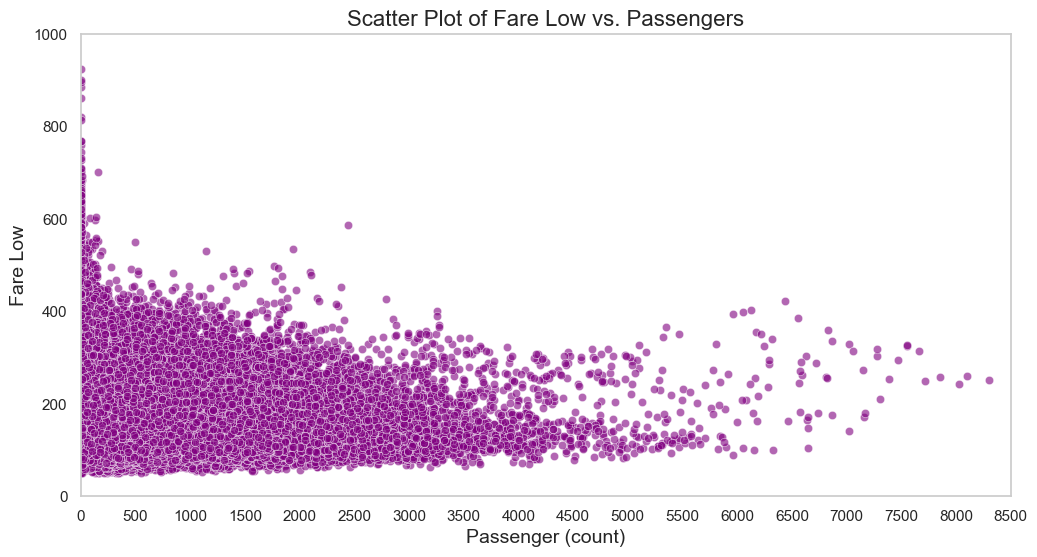

Pearson's Correlation Coefficient: -0.2105792110574893


In [94]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Clean the data by dropping NaN values and removing instances where passengers = 0
data_cleaned = data[['fare_low', 'passengers']].dropna()
data_cleaned = data_cleaned[data_cleaned['passengers'] > 0]  # Remove rows where passengers count is 0

# Set the style of seaborn
sns.set(style="whitegrid")

# Create a scatter plot for fare_low vs passengers
plt.figure(figsize=(12, 6))
sns.scatterplot(x='passengers', y='fare_low', data=data_cleaned, color='purple', alpha=0.6)
plt.title('Scatter Plot of Fare Low vs. Passengers', fontsize=16)
plt.xlabel('Passenger (count)', fontsize=14)
plt.ylabel('Fare Low', fontsize=14)
plt.ylim(0, 1000)  # Set the y-axis limit to 0-1000

# Set x-axis limits and ticks in increments of 500
plt.xlim(0, 8500)  # Set maximum x-axis limit to 8500
plt.xticks(range(0, 8600, 500))  # Set x-ticks by 500

plt.grid()

# Show the plot
plt.show()

# Pearson's correlation coefficient
correlation = data_cleaned['fare_low'].corr(data_cleaned['passengers'])
print("Pearson's Correlation Coefficient:", correlation)


### Analysis on Correlation and Covariance with Passengers and Fare_low
##### Pearson’s Correlation Coefficient statistic quantifies the strength and direction of a linear relationship between two continuous variables. This coefficient of -0.21 indicates that there is not a strong relationship between the number of passengers and fare prices. This means other factors likely influence pricing and passenger counts more significantly.
##### This scatter plot is showing a curved-line which indicates a linear relationship. This indicates that the relationship between the variables varies at different levels. For example, as one variable increases, the other might increase at a faster or slower rate.
##### NOTE: I removed the NAs from these two fields for this analysis and also used passenger counts of greater than 0.


### Conduct a test on your hypothesis using one of the methods covered in Chapter 9.

Correlation between Fare Low and NSMiles: 0.4537999207854014, P-value: 0.0
Correlation between Fare Low and Passengers: -0.21057921105748226, P-value: 0.0
Reject the null hypothesis for NSMiles: There is a significant correlation.
Reject the null hypothesis for Passengers: There is a significant correlation.


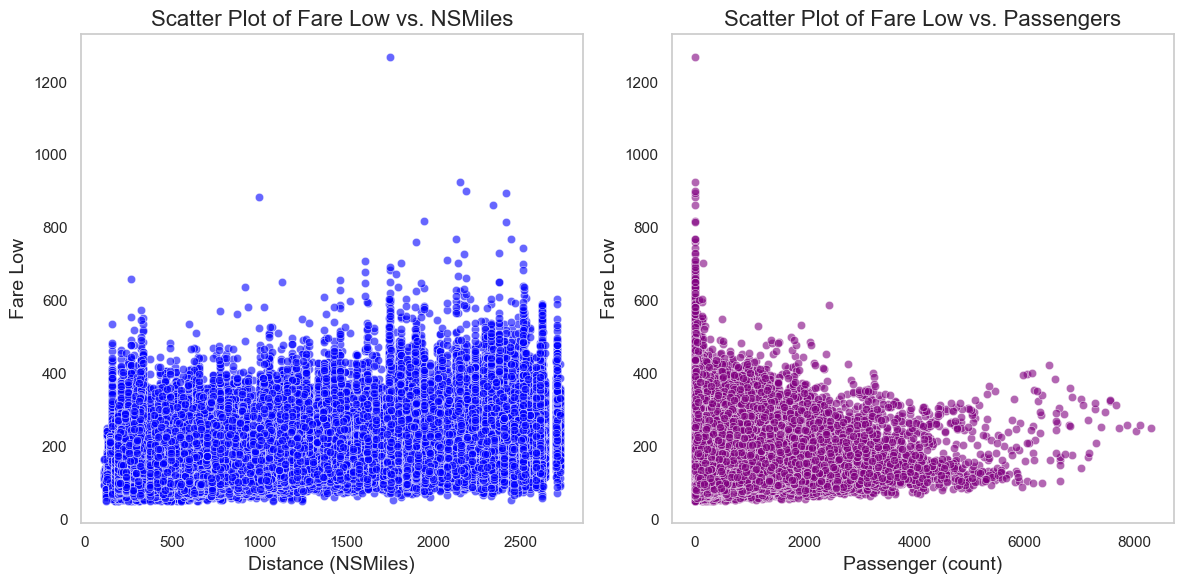

In [98]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import pearsonr

# Clean the data by dropping NaN values
data_cleaned = data[['fare_low', 'nsmiles', 'passengers']].dropna()

# Remove instances where nsmiles, fare_low, or passengers are less than or equal to 0 if needed
data_cleaned = data_cleaned[(data_cleaned['nsmiles'] > 0) & 
                            (data_cleaned['fare_low'] > 0) & 
                            (data_cleaned['passengers'] > 0)]

# Calculate Pearson's correlation coefficient and p-value for fare_low and nsmiles
correlation_nsmiles, p_value_nsmiles = pearsonr(data_cleaned['fare_low'], data_cleaned['nsmiles'])
print(f"Correlation between Fare Low and NSMiles: {correlation_nsmiles}, P-value: {p_value_nsmiles}")

# Calculate Pearson's correlation coefficient and p-value for fare_low and passengers
correlation_passengers, p_value_passengers = pearsonr(data_cleaned['fare_low'], data_cleaned['passengers'])
print(f"Correlation between Fare Low and Passengers: {correlation_passengers}, P-value: {p_value_passengers}")

# Hypothesis testing for nsmiles
alpha = 0.05  # significance level
if p_value_nsmiles < alpha:
    print("Reject the null hypothesis for NSMiles: There is a significant correlation.")
else:
    print("Fail to reject the null hypothesis for NSMiles: There is no significant correlation.")

# Hypothesis testing for passengers
if p_value_passengers < alpha:
    print("Reject the null hypothesis for Passengers: There is a significant correlation.")
else:
    print("Fail to reject the null hypothesis for Passengers: There is no significant correlation.")

# Optional: Visualize the relationships
plt.figure(figsize=(12, 6))

# Scatter plot for fare_low vs nsmiles
plt.subplot(1, 2, 1)
sns.scatterplot(x='nsmiles', y='fare_low', data=data_cleaned, color='blue', alpha=0.6)
plt.title('Scatter Plot of Fare Low vs. NSMiles', fontsize=16)
plt.xlabel('Distance (NSMiles)', fontsize=14)
plt.ylabel('Fare Low', fontsize=14)
plt.grid()

# Scatter plot for fare_low vs passengers
plt.subplot(1, 2, 2)
sns.scatterplot(x='passengers', y='fare_low', data=data_cleaned, color='purple', alpha=0.6)
plt.title('Scatter Plot of Fare Low vs. Passengers', fontsize=16)
plt.xlabel('Passenger (count)', fontsize=14)
plt.ylabel('Fare Low', fontsize=14)
plt.grid()

plt.tight_layout()
plt.show()


### Analysis
#### Fare Low and NSMiles:
##### Correlation Coefficient: 0.45
##### This indicates a moderate positive correlation between fare prices and the distance between airports. As the distance (NSMiles) increases, the fare tends to increase as well. This is expected, as longer flights typically incur higher costs.
##### P-value: 0.0
##### The p-value is less than 0.05, which confirms that the correlation is statistically significant. We can confidently reject the null hypothesis, concluding that there is a meaningful relationship between fare prices and distance.

#### Fare Low and Passengers:
##### Correlation Coefficient: -0.21
##### This indicates a weak negative correlation between fare prices and the number of passengers. As passenger counts increase, fare prices tend to decrease slightly. This could suggest that flights with more passengers might offer lower fares, potentially due to economies of scale or pricing strategies.
##### P-value: 0.0
##### Again, the p-value indicates a statistically significant correlation, allowing us to reject the null hypothesis. Although the correlation is weak, it is still significant.

### For this project, conduct a regression analysis on either one dependent and one explanatory variable, or multiple explanatory variables (Chapter 10 & 11).

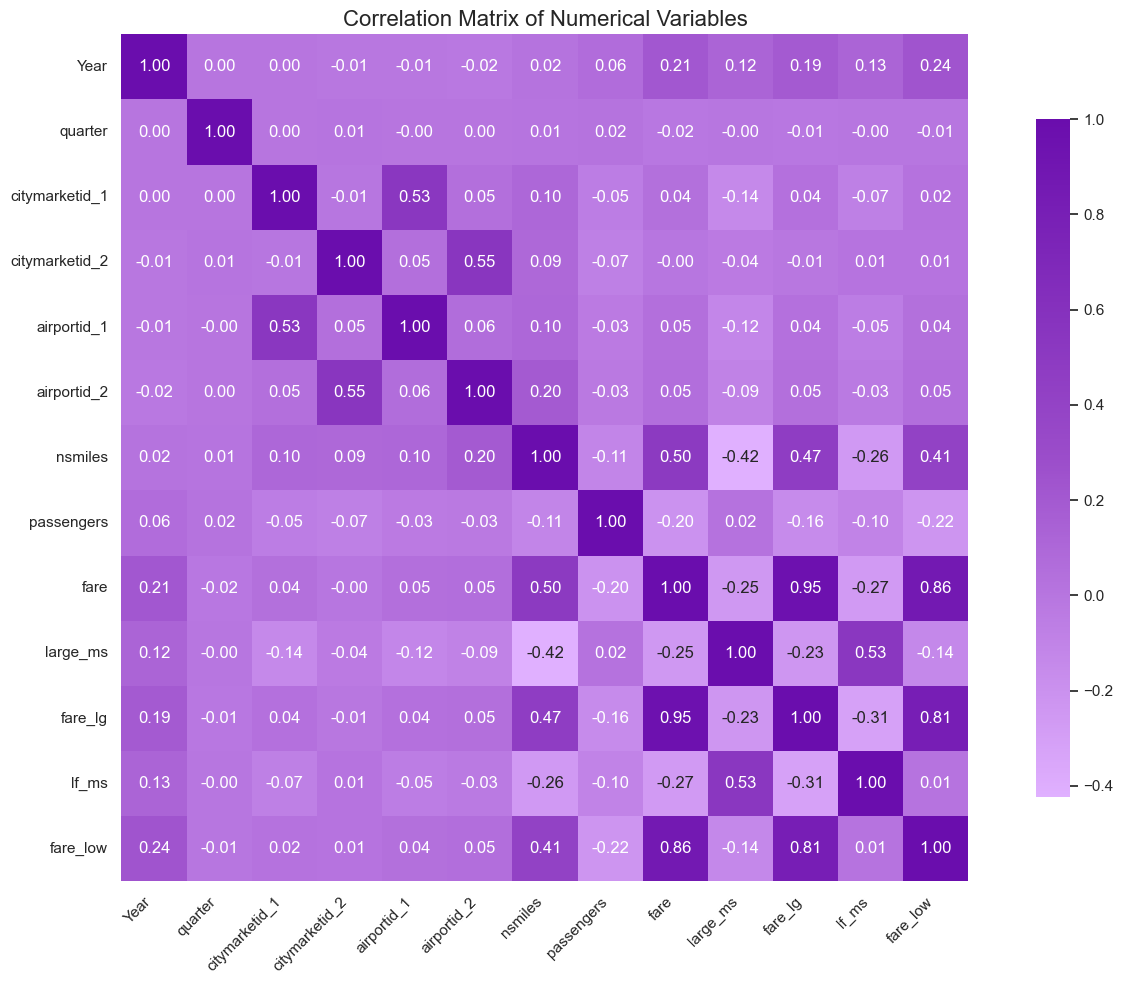

In [104]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import LinearSegmentedColormap

# Select only numeric columns
numeric_data = data_no_outliers.select_dtypes(include=['float64', 'int64'])

# Calculate the correlation matrix
correlation_matrix = numeric_data.corr()

# Set up the matplotlib figure
plt.figure(figsize=(14, 10))

# Define a custom colormap with shades of purple
cmap = LinearSegmentedColormap.from_list("shades_of_purple", ["#E0B0FF", "#9B4DCA", "#6A0DAD"], N=256)

# Create the heatmap with the custom purple colormap
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap=cmap, square=True, cbar_kws={"shrink": .8})

# Add titles and labels
plt.title('Correlation Matrix of Numerical Variables', fontsize=16)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)

# Show the plot
plt.tight_layout()
plt.show()


Checking for NaN values:
nsmiles       0
passengers    0
Year          0
fare          0
fare_lg       0
dtype: int64
0
                            OLS Regression Results                            
Dep. Variable:               fare_low   R-squared:                       0.750
Model:                            OLS   Adj. R-squared:                  0.750
Method:                 Least Squares   F-statistic:                 1.276e+05
Date:                Fri, 15 Nov 2024   Prob (F-statistic):               0.00
Time:                        16:03:12   Log-Likelihood:            -1.0252e+06
No. Observations:              212576   AIC:                         2.050e+06
Df Residuals:                  212570   BIC:                         2.051e+06
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------

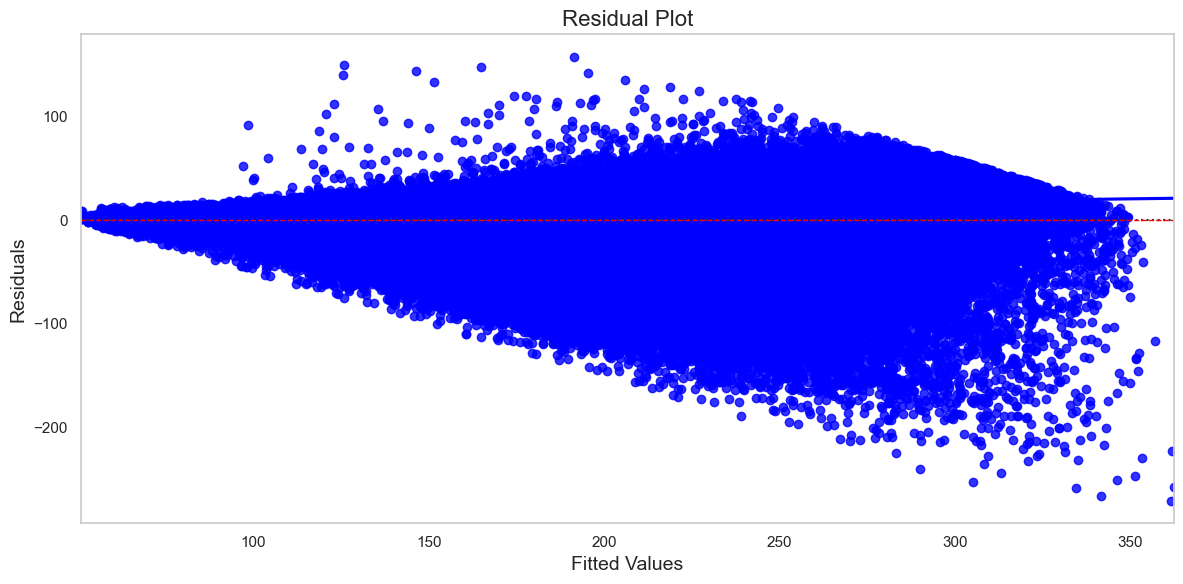

In [109]:
# Multiple Regression Model - Adding in passengers and fare_lg to regression model

import pandas as pd
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt

# Uses 'data_no_outliers' as DataFrame
# Select the relevant columns
X = data_no_outliers[['nsmiles', 'passengers', 'Year', 'fare', 'fare_lg']]
y = data_no_outliers['fare_low']

# Check for NaN values in X and y
print("Checking for NaN values:")
print(X.isnull().sum())
print(y.isnull().sum())

# Drop rows with NaN values in any of the selected columns
data_cleaned = data_no_outliers.dropna(subset=['nsmiles', 'passengers', 'Year', 'fare', 'fare_lg', 'fare_low'])

# Redefine X and y after dropping NaNs
X = data_cleaned[['nsmiles', 'passengers', 'Year', 'fare', 'fare_lg']]
y = data_cleaned['fare_low']

# Add a constant to the independent variables
X = sm.add_constant(X)

# Fit the regression model
model = sm.OLS(y, X).fit()

# Print the summary of the regression
print(model.summary())

# Visualize the residuals
plt.figure(figsize=(12, 6))
sns.residplot(x=model.fittedvalues, y=model.resid, lowess=True, color='blue')
plt.axhline(0, linestyle='--', color='red', linewidth=1)
plt.title('Residual Plot', fontsize=16)
plt.xlabel('Fitted Values', fontsize=14)
plt.ylabel('Residuals', fontsize=14)
plt.grid()

# Show the residual plot
plt.tight_layout()
plt.show()


### Analysis
##### An R-squared value of 0.750 means that approximately 75% of the variability in the dependent variable (in this case, fare_low) can be explained by the independent variables included in your regression model (nsmiles, passengers, Year, fare, and fare_lg).
##### All P-values are 0.000, indicating that each independent variable is statistically significant at common significance levels (e.g., 0.05). This means there's strong evidence to reject the null hypothesis for each variable, indicating that they do contribute to the model.
##### Confidence Intervals: These intervals provide a range within which we can be 95% confident that the true parameter lies. For instance, for nsmiles, the interval is [-0.003, -0.003], suggesting strong confidence in the negative impact of miles on fares.
##### The model indicates that nsmiles and passengers are negatively correlated with fare_low, while Year and fare are positively correlated. The statistically significant results suggest that these relationships are unlikely to be due to random chance.


# Extra Exploratory Data for Project

In [84]:
print(data_no_outliers.isnull().sum())


tbl                   0
Year                  0
quarter               0
citymarketid_1        0
citymarketid_2        0
city1                 0
city2                 0
airportid_1           0
airportid_2           0
airport_1             0
airport_2             0
nsmiles               0
passengers            0
fare                  0
carrier_lg         1304
large_ms           1304
fare_lg            1304
carrier_low        1375
lf_ms              1375
fare_low           1375
Geocoded_City1    37290
Geocoded_City2    37290
tbl1apk               0
dtype: int64


In [104]:
# Remove nulls for these columns by using the mean of that specific column
import pandas as pd

# List of columns to fill nulls
columns_to_fill = ['fare_low', 'carrier_lg', 'carrier_low']

# Fill nulls with the mean for fare_low and mode for carrier_lg and carrier_low
for column in columns_to_fill:
    if data_no_outliers[column].dtype in ['float64', 'int64']:
        # Calculate the mean for numerical columns
        mean_value = data_no_outliers[column].mean()
        data_no_outliers[column].fillna(mean_value, inplace=True)  # Fill nulls with the mean
    elif data_no_outliers[column].dtype == 'object':
        # Calculate the mode for categorical columns
        mode_value = data_no_outliers[column].mode()[0]  # Get the first mode value
        data_no_outliers[column].fillna(mode_value, inplace=True)  # Fill nulls with the mode

# Check the updated DataFrame
print("Updated DataFrame:")
print(data_no_outliers)


Updated DataFrame:
            tbl  Year  quarter  citymarketid_1  citymarketid_2  \
0       Table1a  2021        3           30135           33195   
1       Table1a  2021        3           30135           33195   
2       Table1a  2021        3           30140           30194   
3       Table1a  2021        3           30140           30194   
4       Table1a  2021        3           30140           30466   
...         ...   ...      ...             ...             ...   
245931  Table1a  2024        1           34614           32457   
245932  Table1a  2024        1           34614           33195   
245933  Table1a  2024        1           34685           30852   
245934  Table1a  2024        1           34685           30852   
245935  Table1a  2024        1           34685           30852   

                                 city1                                  city2  \
0       Allentown/Bethlehem/Easton, PA          Tampa, FL (Metropolitan Area)   
1       Allentown/Bethlehe

In [106]:
# recheck Null values for fare_low
print(data_no_outliers.isnull().sum())

tbl                   0
Year                  0
quarter               0
citymarketid_1        0
citymarketid_2        0
city1                 0
city2                 0
airportid_1           0
airportid_2           0
airport_1             0
airport_2             0
nsmiles               0
passengers            0
fare                  0
carrier_lg            0
large_ms           1304
fare_lg            1304
carrier_low           0
lf_ms              1375
fare_low              0
Geocoded_City1    37290
Geocoded_City2    37290
tbl1apk               0
dtype: int64


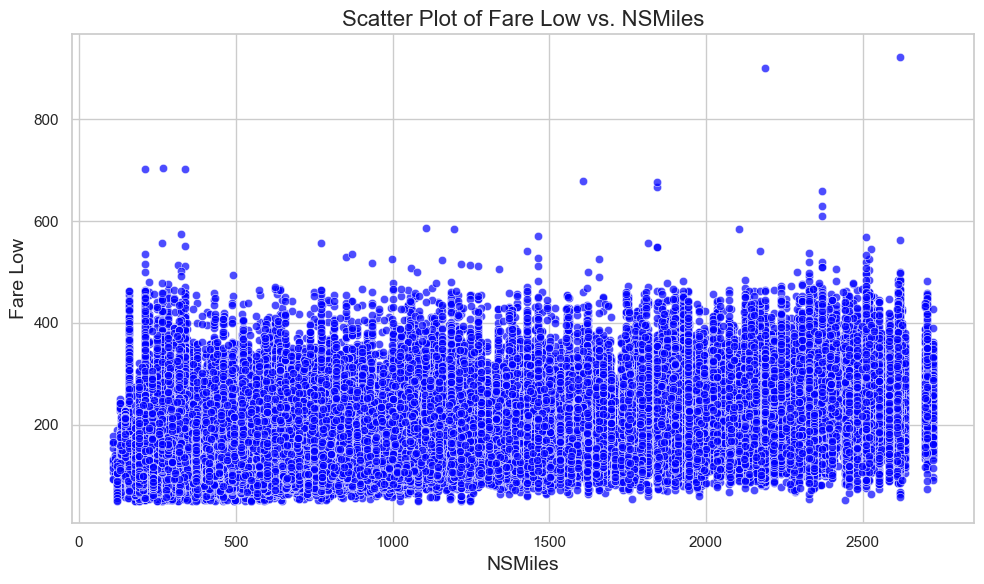

Correlation coefficient between Fare Low and NSMiles: 0.4329


In [108]:
# What is the relationship between fare and nsmiles?
# This df has cleaned fare_low with NULLs to use mean and has removed outliers by using the z-score.

import seaborn as sns
import matplotlib.pyplot as plt

# Set the style of seaborn
sns.set(style="whitegrid")

# Create a scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data_no_outliers, x='nsmiles', y='fare_low', color='blue', alpha=0.7)

# Add titles and labels
plt.title('Scatter Plot of Fare Low vs. NSMiles', fontsize=16)
plt.xlabel('NSMiles', fontsize=14)
plt.ylabel('Fare Low', fontsize=14)

# Show the plot
plt.tight_layout()
plt.show()

# Calculate the correlation coefficient
correlation_coefficient = data_no_outliers['fare_low'].corr(data_no_outliers['nsmiles'])

# Print the result
print(f'Correlation coefficient between Fare Low and NSMiles: {correlation_coefficient:.4f}')



In [110]:
# What is the average fare by year?
import pandas as pd

# Convert 'fare_low' to numeric, forcing errors to NaN if there are any issues
data_no_outliers['fare_low'] = pd.to_numeric(data_no_outliers['fare_low'], errors='coerce')

# Calculate the average fare by year
average_fare_by_year = data_no_outliers.groupby('Year')['fare_low'].mean().reset_index()

# Print the result
print(average_fare_by_year)



    Year    fare_low
0   1993  181.416881
1   1994  183.743972
2   1996  169.122451
3   1997  171.641691
4   1998  174.512180
5   1999  174.736733
6   2000  178.272494
7   2001  164.655044
8   2002  164.520610
9   2003  171.568032
10  2004  166.349505
11  2005  165.536609
12  2006  181.935799
13  2007  178.575639
14  2008  192.904884
15  2009  171.823346
16  2010  190.571660
17  2011  206.721147
18  2012  213.654685
19  2013  218.327621
20  2014  223.066971
21  2015  219.227200
22  2016  216.234726
23  2017  213.909322
24  2018  210.751412
25  2019  212.230126
26  2020  168.134146
27  2021  180.579674
28  2022  207.777868
29  2023  207.438481
30  2024  210.683086


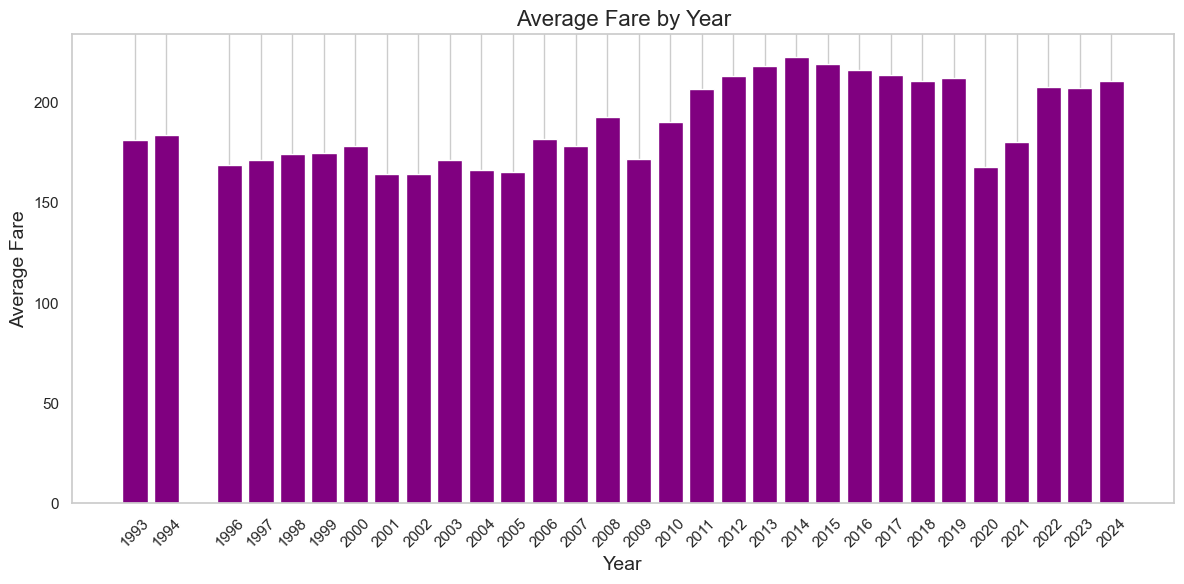

In [112]:
# Graph average fare by year
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming your DataFrame is named 'data_no_outliers'
# Convert 'fare_low' to numeric if it's not already
data_no_outliers['fare_low'] = pd.to_numeric(data_no_outliers['fare_low'], errors='coerce')

# Group by year and calculate the average fare
average_fare_by_year = data_no_outliers.groupby('Year')['fare_low'].mean().reset_index()

# Set the style
sns.set(style="whitegrid")

# Plotting the average fare by year as a bar chart
plt.figure(figsize=(12, 6))
plt.bar(average_fare_by_year['Year'], average_fare_by_year['fare_low'], color='purple')  # Set color to purple
plt.title('Average Fare by Year', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Average Fare', fontsize=14)
plt.xticks(average_fare_by_year['Year'], rotation=45)  # Rotate x-axis labels for better visibility
plt.grid(axis='y')  # Add grid lines for better readability
plt.tight_layout()
plt.show()


### Are there particular routes that are more expensive?

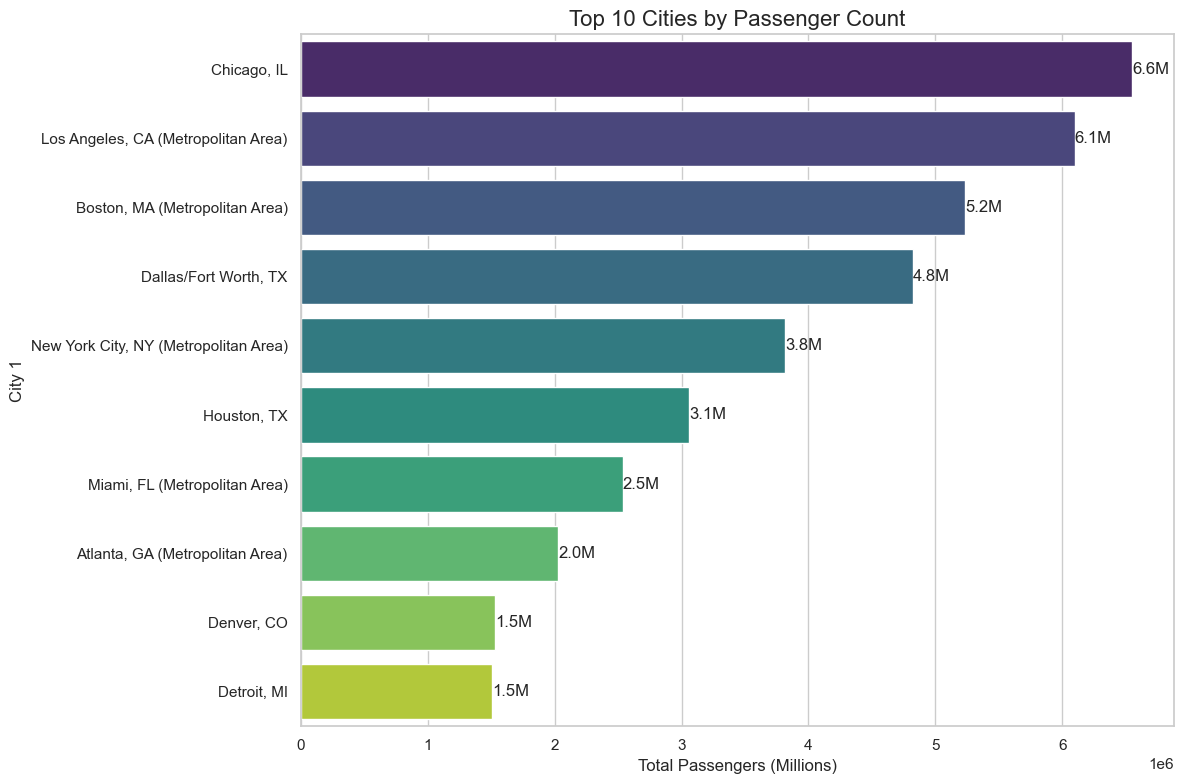

In [114]:
# Graph Top 10 cities by passenger count
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set the figure size
plt.figure(figsize=(12, 8))

# Calculate total passengers by city and get the top 10
top_cities = data_no_outliers.groupby('city1')['passengers'].sum().nlargest(10).reset_index()

# Create the bar plot
ax = sns.barplot(x='passengers', y='city1', data=top_cities, palette='viridis')

# Add titles and labels
plt.title('Top 10 Cities by Passenger Count', fontsize=16)
plt.xlabel('Total Passengers (Millions)', fontsize=12)
plt.ylabel('City 1', fontsize=12)

# Add labels to each bar in millions
for p in ax.patches:
    passenger_count_millions = p.get_width() / 1_000_000  # Convert to millions
    ax.annotate(f'{passenger_count_millions:.1f}M', 
                (p.get_width(), p.get_y() + p.get_height() / 2), 
                ha='left', va='center', 
                fontsize=12)

# Show the plot
plt.tight_layout()
plt.show()


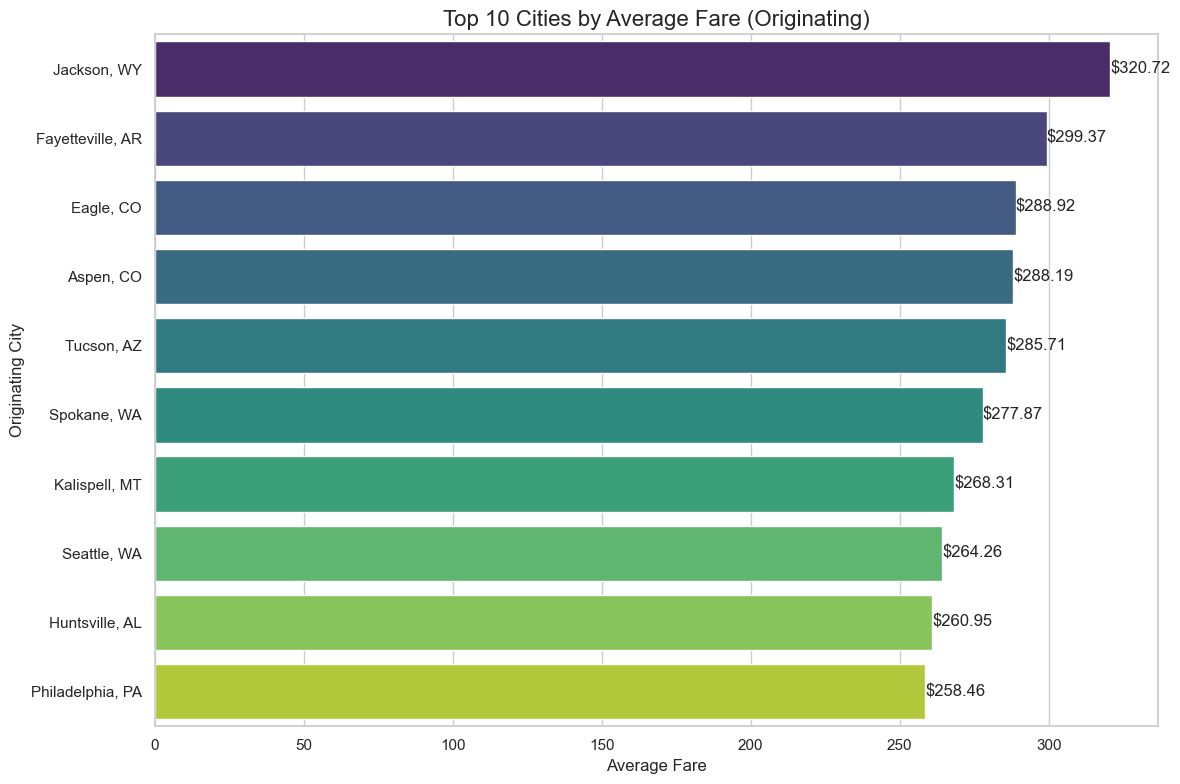

In [256]:
# Graph Top 10 cities by average fare city1 (Originating City)
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set the figure size
plt.figure(figsize=(12, 8))

# Calculate average fare by city and get the top 10
top_cities_avg_fare = data_no_outliers.groupby('city1')['fare'].mean().nlargest(10).reset_index()

# Create the bar plot
ax = sns.barplot(x='fare', y='city1', data=top_cities_avg_fare, palette='viridis')

# Add titles and labels
plt.title('Top 10 Cities by Average Fare (Originating)', fontsize=16)
plt.xlabel('Average Fare', fontsize=12)
plt.ylabel('Originating City', fontsize=12)

# Add labels to each bar
for p in ax.patches:
    avg_fare = p.get_width()  # Average fare
    ax.annotate(f'${avg_fare:,.2f}', 
                (p.get_width(), p.get_y() + p.get_height() / 2), 
                ha='left', va='center', 
                fontsize=12)

# Show the plot
plt.tight_layout()
plt.show()


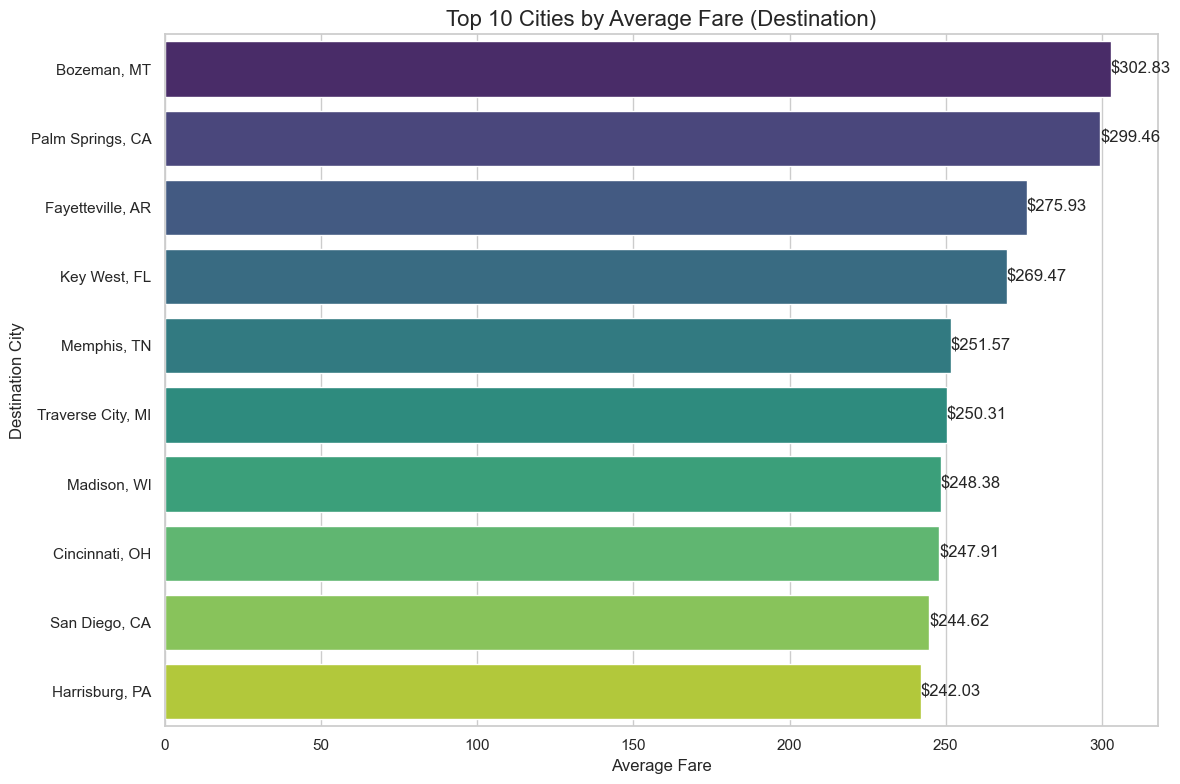

In [254]:
# Graph Top 10 cities by average fare using city2 (Destination city)
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set the figure size
plt.figure(figsize=(12, 8))

# Calculate average fare by city2 and get the top 10
top_cities_avg_fare = data_no_outliers.groupby('city2')['fare'].mean().nlargest(10).reset_index()

# Create the bar plot
ax = sns.barplot(x='fare', y='city2', data=top_cities_avg_fare, palette='viridis')

# Add titles and labels
plt.title('Top 10 Cities by Average Fare (Destination)', fontsize=16)
plt.xlabel('Average Fare', fontsize=12)
plt.ylabel('Destination City', fontsize=12)

# Add labels to each bar
for p in ax.patches:
    avg_fare = p.get_width()  # Average fare
    ax.annotate(f'${avg_fare:,.2f}', 
                (p.get_width(), p.get_y() + p.get_height() / 2), 
                ha='left', va='center', 
                fontsize=12)

# Show the plot
plt.tight_layout()
plt.show()


### What destination airport has the highest / lowest fares?

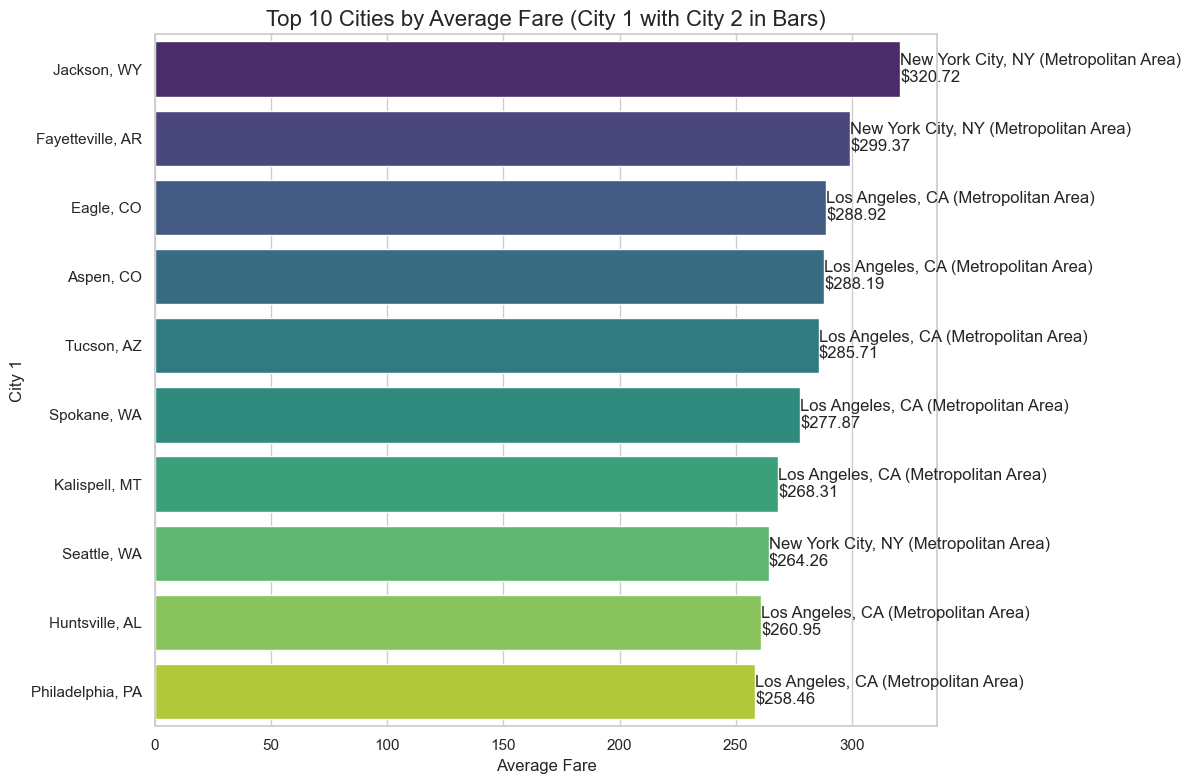

In [264]:
# Graph Top 10 cities by average fare by concatenating city1 and city2 to get highest routes.
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set the figure size
plt.figure(figsize=(12, 8))

# Create a new DataFrame to combine city1 and city2 for analysis
combined_cities = data_no_outliers[['city1', 'city2', 'fare']]

# Calculate average fare by city1 and city2, and get the top 10 based on average fare
top_cities_avg_fare = combined_cities.groupby('city1')['fare'].mean().nlargest(10).reset_index()

# Merge with city2 for corresponding city names
top_cities_avg_fare = top_cities_avg_fare.merge(combined_cities[['city1', 'city2']], on='city1', how='left')

# Create the bar plot
ax = sns.barplot(x='fare', y='city1', data=top_cities_avg_fare, palette='viridis')

# Add titles and labels
plt.title('Top 10 Cities by Average Fare (City 1 with City 2 in Bars)', fontsize=16)
plt.xlabel('Average Fare', fontsize=12)
plt.ylabel('City 1', fontsize=12)

# Add labels to each bar showing city2 and the average fare
for p in ax.patches:
    avg_fare = p.get_width()  # Average fare
    city1_name = top_cities_avg_fare['city1'].iloc[int(p.get_y() + p.get_height() / 2)]
    city2_name = top_cities_avg_fare['city2'].iloc[int(p.get_y() + p.get_height() / 2)]
    
    ax.annotate(f'{city2_name}\n${avg_fare:,.2f}', 
                (p.get_width(), p.get_y() + p.get_height() / 2), 
                ha='left', va='center', 
                fontsize=12)

# Show the plot
plt.tight_layout()
plt.show()


### Are there particular routes that are least expensive?
### What destination airport has the highest / lowest fares?

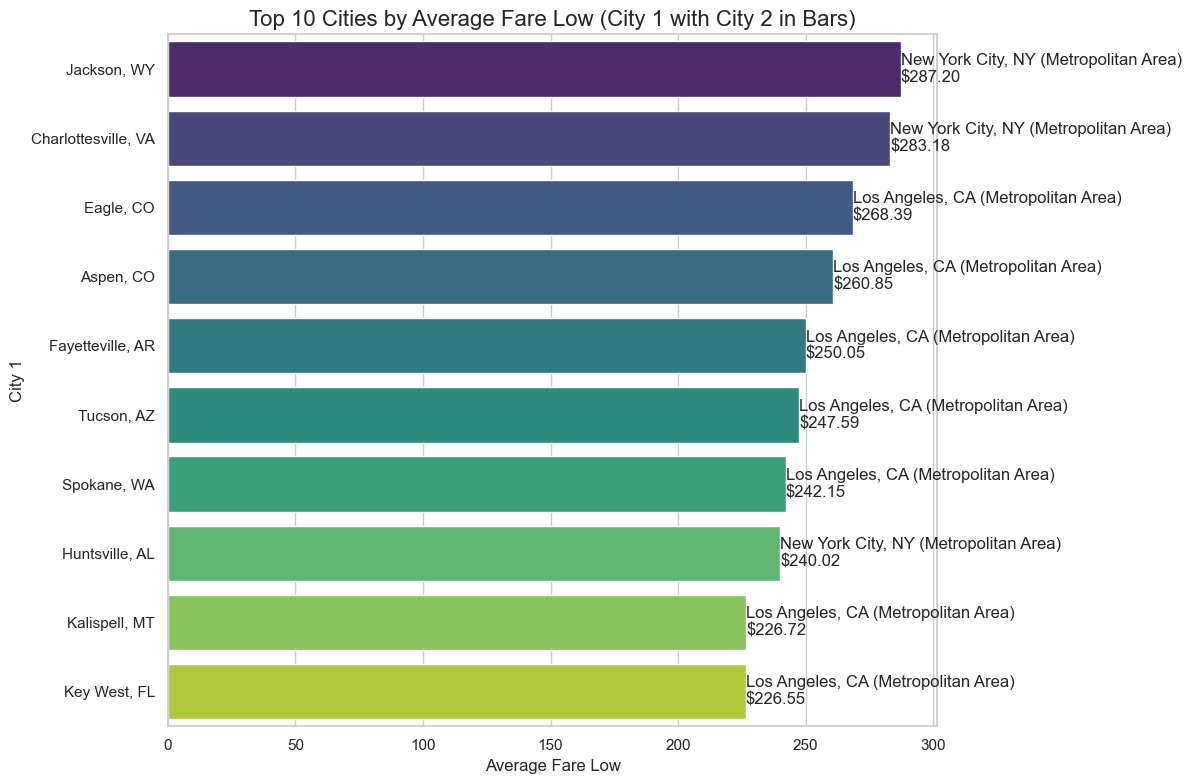

In [268]:
# Graph Top 10 cities by average fare_low using city1 on y-axis and city2 in the bars
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set the figure size
plt.figure(figsize=(12, 8))

# Create a new DataFrame to combine city1 and city2 for analysis
combined_cities = data_no_outliers[['city1', 'city2', 'fare_low']]

# Calculate average fare_low by city1 and get the top 10 based on average fare_low
top_cities_avg_fare_low = combined_cities.groupby('city1')['fare_low'].mean().nlargest(10).reset_index()

# Merge with city2 for corresponding city names
top_cities_avg_fare_low = top_cities_avg_fare_low.merge(combined_cities[['city1', 'city2']], on='city1', how='left')

# Create the bar plot
ax = sns.barplot(x='fare_low', y='city1', data=top_cities_avg_fare_low, palette='viridis')

# Add titles and labels
plt.title('Top 10 Cities by Average Fare Low (City 1 with City 2 in Bars)', fontsize=16)
plt.xlabel('Average Fare Low', fontsize=12)
plt.ylabel('City 1', fontsize=12)

# Add labels to each bar showing city2 and the average fare_low
for p in ax.patches:
    avg_fare_low = p.get_width()  # Average fare_low
    city1_name = top_cities_avg_fare_low['city1'].iloc[int(p.get_y() + p.get_height() / 2)]
    city2_name = top_cities_avg_fare_low['city2'].iloc[int(p.get_y() + p.get_height() / 2)]
    
    ax.annotate(f'{city2_name}\n${avg_fare_low:,.2f}', 
                (p.get_width(), p.get_y() + p.get_height() / 2), 
                ha='left', va='center', 
                fontsize=12)

# Show the plot
plt.tight_layout()
plt.show()


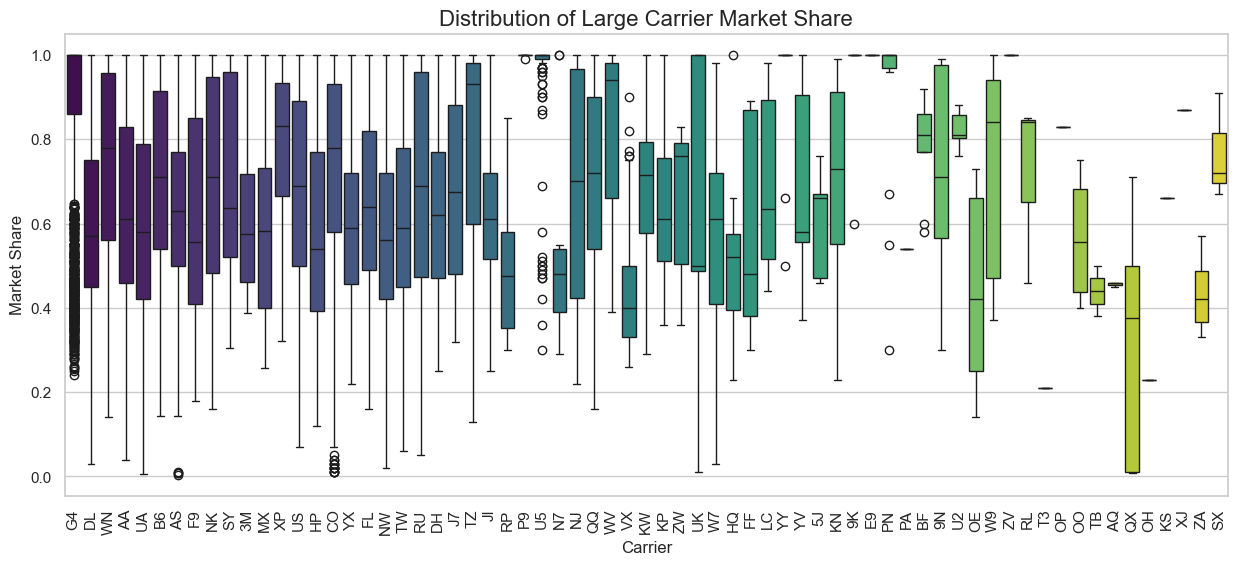

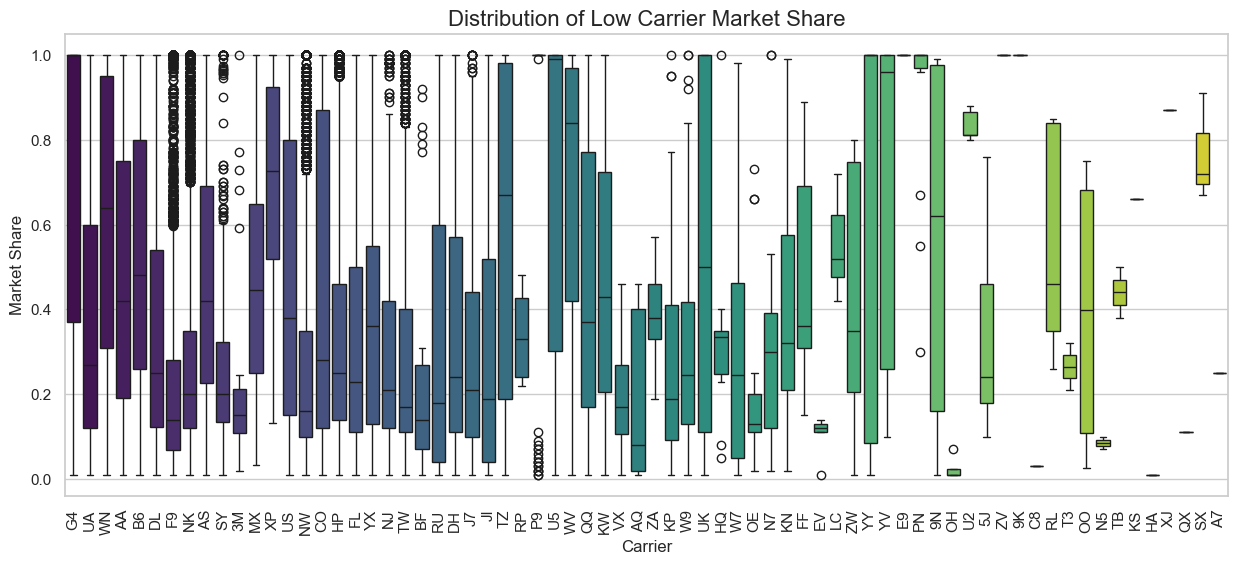

In [116]:
# What is the distribution of carrier_lg and carrier_low market shares?

#Box plot for large carrier market share
plt.figure(figsize=(15, 6))
sns.boxplot(x='carrier_lg', y='large_ms', data=data_no_outliers, palette='viridis')
plt.title('Distribution of Large Carrier Market Share', fontsize=16)
plt.xlabel('Carrier', fontsize=12)
plt.xticks(rotation=90)
plt.ylabel('Market Share', fontsize=12)
plt.show()

# Box plot for low carrier market share
plt.figure(figsize=(15, 6))
sns.boxplot(x='carrier_low', y='lf_ms', data=data_no_outliers, palette='viridis')
plt.title('Distribution of Low Carrier Market Share', fontsize=16)
plt.xlabel('Carrier', fontsize=12)
plt.xticks(rotation=90)
plt.ylabel('Market Share', fontsize=12)
plt.show()


In [118]:
# What are the most common airport_1 and airport_2 pairs?
import pandas as pd

# Assuming your DataFrame is named 'data_no_outliers'
# Count occurrences of each airport_1 and airport_2 pair
common_airport_pairs = data_no_outliers.groupby(['airport_1', 'airport_2']).size().reset_index(name='count')

# Sort the pairs by count in descending order
common_airport_pairs_sorted = common_airport_pairs.sort_values(by='count', ascending=False)

# Display the top 10 most common pairs
top_common_pairs = common_airport_pairs_sorted.head(10)
print(top_common_pairs)


     airport_1 airport_2  count
2005       HOU       MIA    118
1028       CLT       SFO    118
1040       CMH       DFW    118
1038       CMH       DCA    118
1036       CMH       BWI    118
1035       CMH       BUR    118
2899       MHT       FLL    118
1032       CLT       TPA    118
1030       CLT       SNA    118
2905       MHT       IAD    118


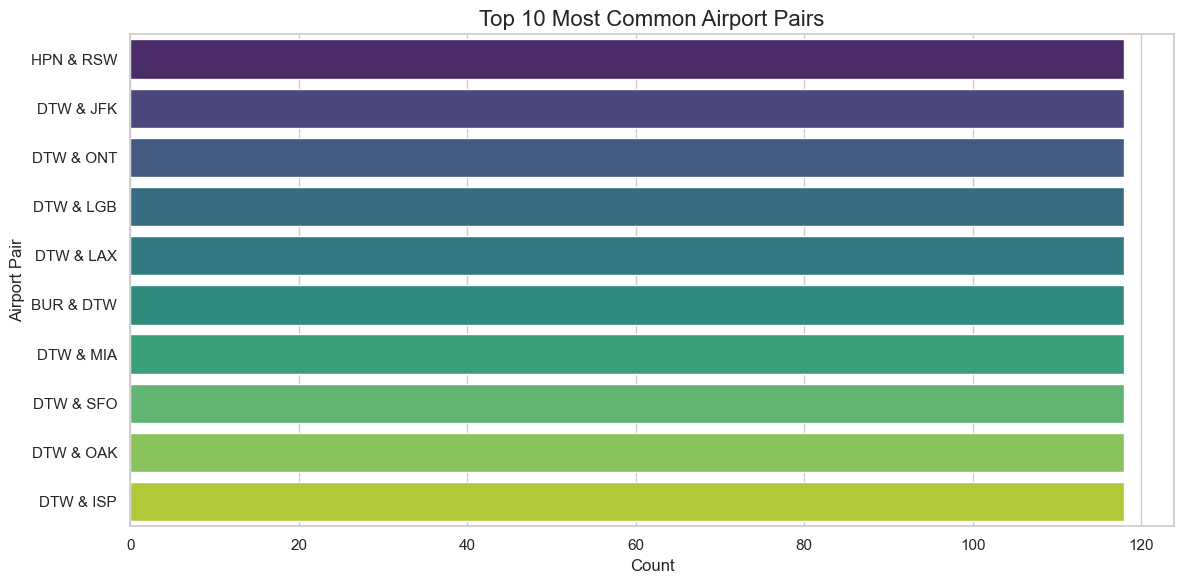

In [120]:
# Graph 10  most common airport pairs
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Create a new column for airport pairs
data_no_outliers['airport_pair'] = data_no_outliers.apply(
    lambda row: tuple(sorted([row['airport_1'], row['airport_2']])), axis=1
)

# Count the occurrences of each airport pair
common_pairs = data_no_outliers['airport_pair'].value_counts().reset_index()

# Rename columns for clarity
common_pairs.columns = ['Airport Pair', 'Count']

# Get the most common pairs
most_common_pairs = common_pairs.nlargest(10, 'Count')

# Convert airport pairs to strings for plotting
most_common_pairs['Airport Pair'] = most_common_pairs['Airport Pair'].apply(lambda x: ' & '.join(x))

# Ensure 'Count' is treated as numeric
most_common_pairs['Count'] = most_common_pairs['Count'].astype(int)

# Plotting
plt.figure(figsize=(12, 6))
sns.barplot(x='Count', y='Airport Pair', data=most_common_pairs, palette='viridis')
plt.title('Top 10 Most Common Airport Pairs', fontsize=16)
plt.xlabel('Count', fontsize=12)
plt.ylabel('Airport Pair', fontsize=12)
plt.tight_layout()
plt.show()


In [140]:
# Which city1 and city2 combinations have the highest average fare?
import pandas as pd

# Group by city1 and city2, then calculate the average fare
average_fare_by_city_pair = data_no_outliers.groupby(['city1', 'city2'])['fare_low'].mean().reset_index()

# Rename columns for clarity
average_fare_by_city_pair.columns = ['City 1', 'City 2', 'Average Fare']

# Get the combinations with the highest average fare
highest_average_fare = average_fare_by_city_pair.nlargest(10, 'Average Fare')

# Display the result
print(highest_average_fare)


                         City 1                                 City 2  \
44                    Aspen, CO          Miami, FL (Metropolitan Area)   
620                   Eagle, CO          Miami, FL (Metropolitan Area)   
793                 Jackson, WY  New York City, NY (Metropolitan Area)   
626                 El Paso, TX          Miami, FL (Metropolitan Area)   
298                 Chicago, IL                           Key West, FL   
776              Huntsville, AL    Los Angeles, CA (Metropolitan Area)   
481       Dallas/Fort Worth, TX                           Key West, FL   
87                   Austin, TX               Minneapolis/St. Paul, MN   
1021   Minneapolis/St. Paul, MN                           Portland, OR   
688   Greensboro/High Point, NC  San Francisco, CA (Metropolitan Area)   

      Average Fare  
44      384.220000  
620     347.789091  
793     329.916410  
626     326.705000  
298     324.247143  
776     320.705926  
481     319.780000  
87      311.16000

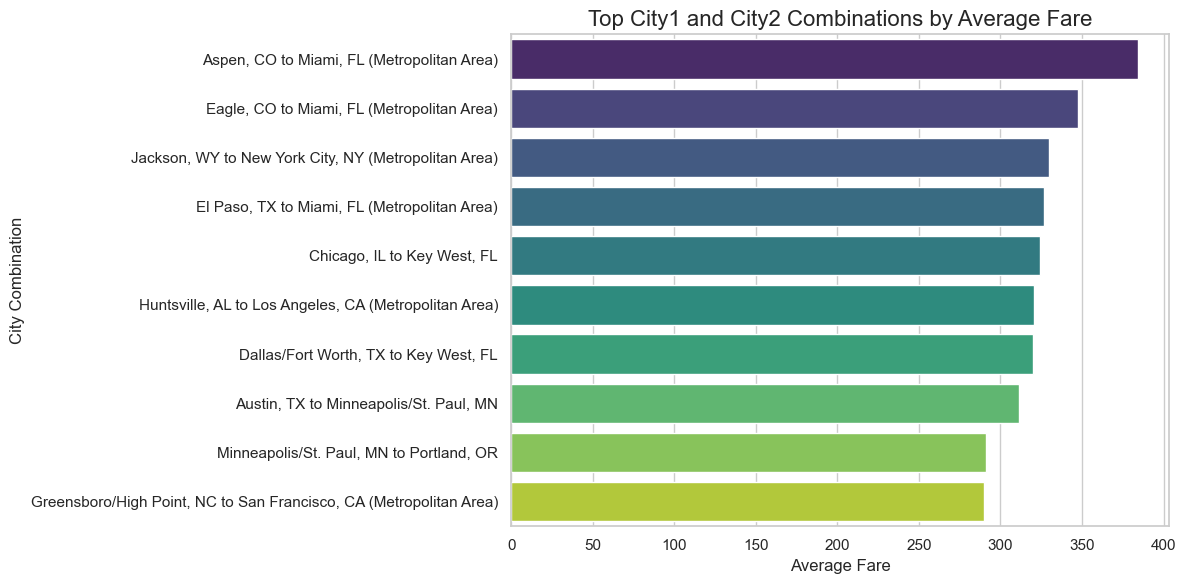

In [142]:
# Create a box plot of top city combinations
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Group by city1 and city2, then calculate the average fare
average_fare_by_city_pair = data_no_outliers.groupby(['city1', 'city2'])['fare_low'].mean().reset_index()

# Rename columns for clarity
average_fare_by_city_pair.columns = ['City 1', 'City 2', 'Average Fare']

# Get the combinations with the highest average fare
highest_average_fare = average_fare_by_city_pair.nlargest(10, 'Average Fare')

# Create a combined column for city pairs
highest_average_fare['City 1 + City 2'] = highest_average_fare['City 1'] + " to " + highest_average_fare['City 2']

# Plotting the top combinations
plt.figure(figsize=(12, 6))
sns.barplot(x='Average Fare', y='City 1 + City 2', data=highest_average_fare, palette='viridis')
plt.title('Top City1 and City2 Combinations by Average Fare', fontsize=16)
plt.xlabel('Average Fare', fontsize=12)
plt.ylabel('City Combination', fontsize=12)
plt.tight_layout()
plt.show()


### Are airfares higher in certain times of the year? (use year, quarter, fare)

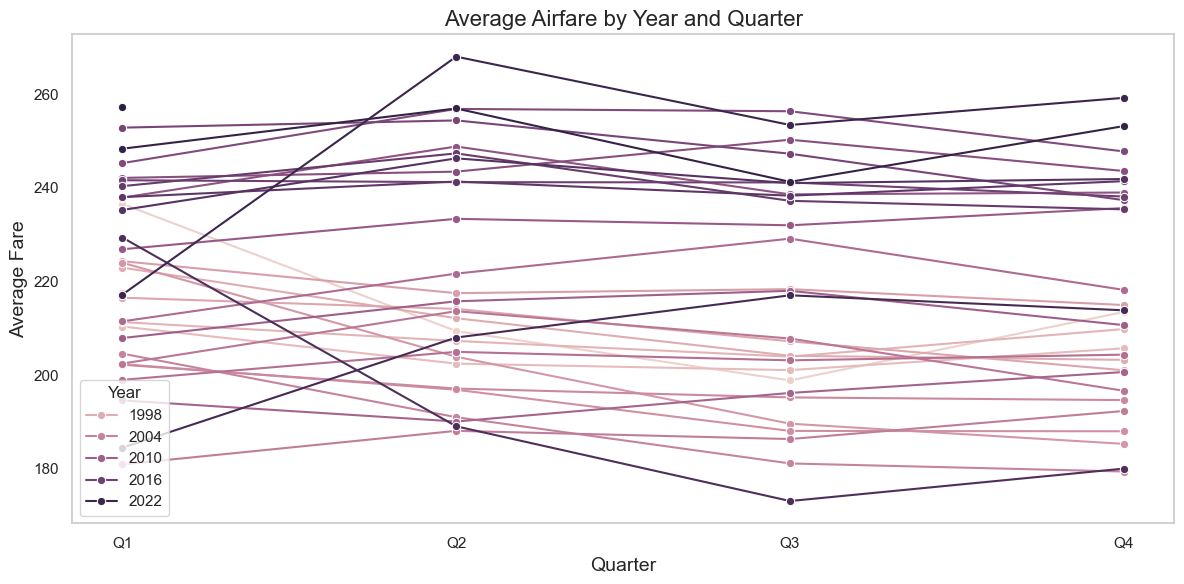

In [273]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'data' is your DataFrame with the relevant columns
# Clean the data by dropping NaN values for fare, Year, and Quarter
data_cleaned = data[['fare', 'Year', 'quarter']].dropna()

# Calculate average fare by Year and Quarter
avg_fare_by_time = data_cleaned.groupby(['Year', 'quarter'])['fare'].mean().reset_index()

# Set the figure size
plt.figure(figsize=(12, 6))

# Create a line plot to visualize the average fare by year and quarter
sns.lineplot(data=avg_fare_by_time, x='quarter', y='fare', hue='Year', marker='o')

# Add titles and labels
plt.title('Average Airfare by Year and Quarter', fontsize=16)
plt.xlabel('Quarter', fontsize=14)
plt.ylabel('Average Fare', fontsize=14)
plt.xticks(ticks=[1, 2, 3, 4], labels=['Q1', 'Q2', 'Q3', 'Q4'])  # Label quarters
plt.grid()

# Show the plot
plt.tight_layout()
plt.show()


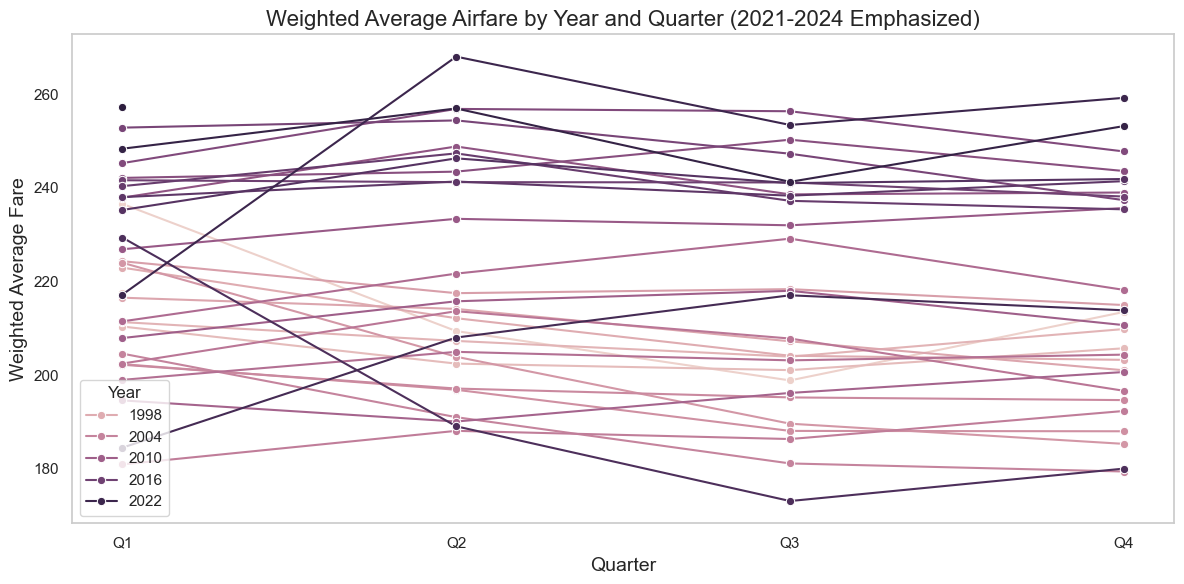

In [283]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'data' is your DataFrame with the relevant columns
# Clean the data by dropping NaN values for fare, Year, and Quarter
data_cleaned = data[['fare', 'Year', 'quarter']].dropna()

# Assign weights to years: 2021-2024 gets a weight of 2, others get 1
data_cleaned['weight'] = data_cleaned['Year'].apply(lambda x: 2 if 2021 <= x <= 2024 else 1)

# Calculate the weighted average fare by Year and Quarter
avg_fare_by_time = (
    data_cleaned.groupby(['Year', 'quarter'])
    .apply(lambda x: (x['fare'] * x['weight']).sum() / x['weight'].sum())
    .reset_index(name='weighted_fare')
)

# Set the figure size
plt.figure(figsize=(12, 6))

# Create a line plot to visualize the weighted average fare by year and quarter
sns.lineplot(data=avg_fare_by_time, x='quarter', y='weighted_fare', hue='Year', marker='o')

# Add titles and labels
plt.title('Weighted Average Airfare by Year and Quarter (2021-2024 Emphasized)', fontsize=16)
plt.xlabel('Quarter', fontsize=14)
plt.ylabel('Weighted Average Fare', fontsize=14)
plt.xticks(ticks=[1, 2, 3, 4], labels=['Q1', 'Q2', 'Q3', 'Q4'])  # Label quarters
plt.grid()

# Show the plot
plt.tight_layout()
plt.show()


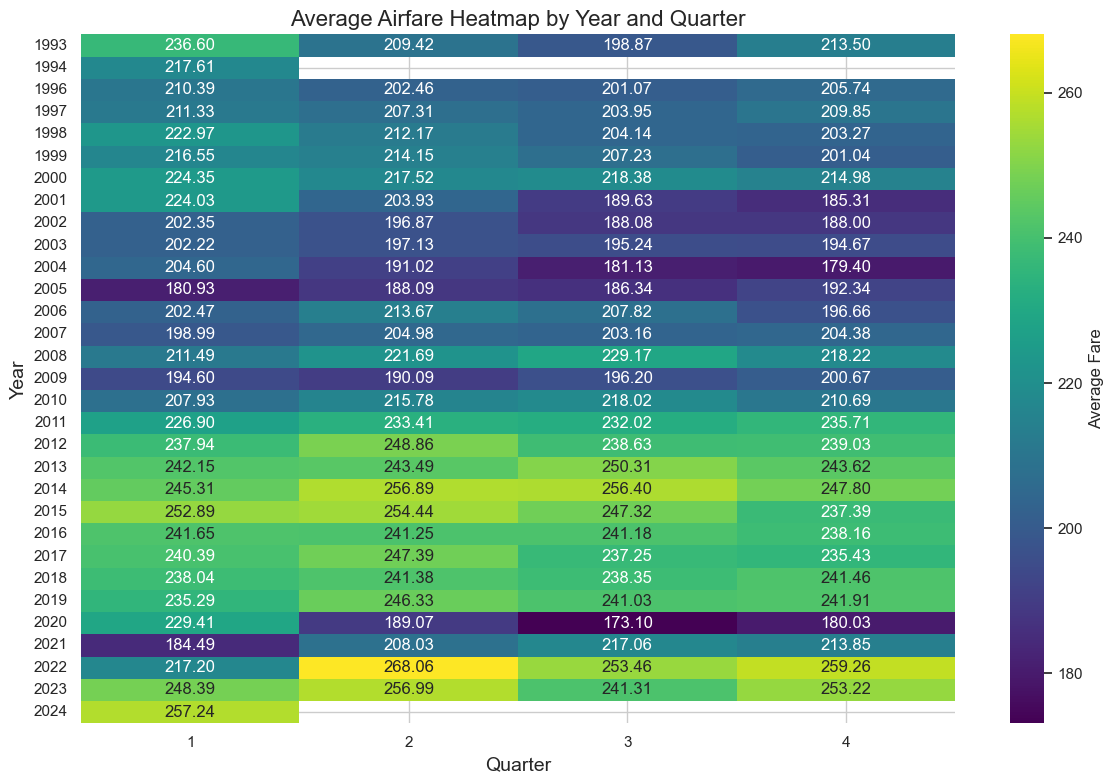

In [291]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'data' is your DataFrame with the relevant columns
data_cleaned = data[['fare', 'Year', 'quarter']].dropna()

# Calculate average fare by Year and Quarter
avg_fare_heatmap = data_cleaned.groupby(['Year', 'quarter']).agg({'fare': 'mean'}).reset_index()

# Pivot for heatmap
heatmap_data = avg_fare_heatmap.pivot(index='Year', columns='quarter', values='fare')

# Set the figure size
plt.figure(figsize=(12, 8))

# Create the heatmap
sns.heatmap(heatmap_data, annot=True, fmt=".2f", cmap='viridis', cbar_kws={'label': 'Average Fare'})

# Add titles and labels
plt.title('Average Airfare Heatmap by Year and Quarter', fontsize=16)
plt.xlabel('Quarter', fontsize=14)
plt.ylabel('Year', fontsize=14)

# Show the plot
plt.tight_layout()
plt.show()


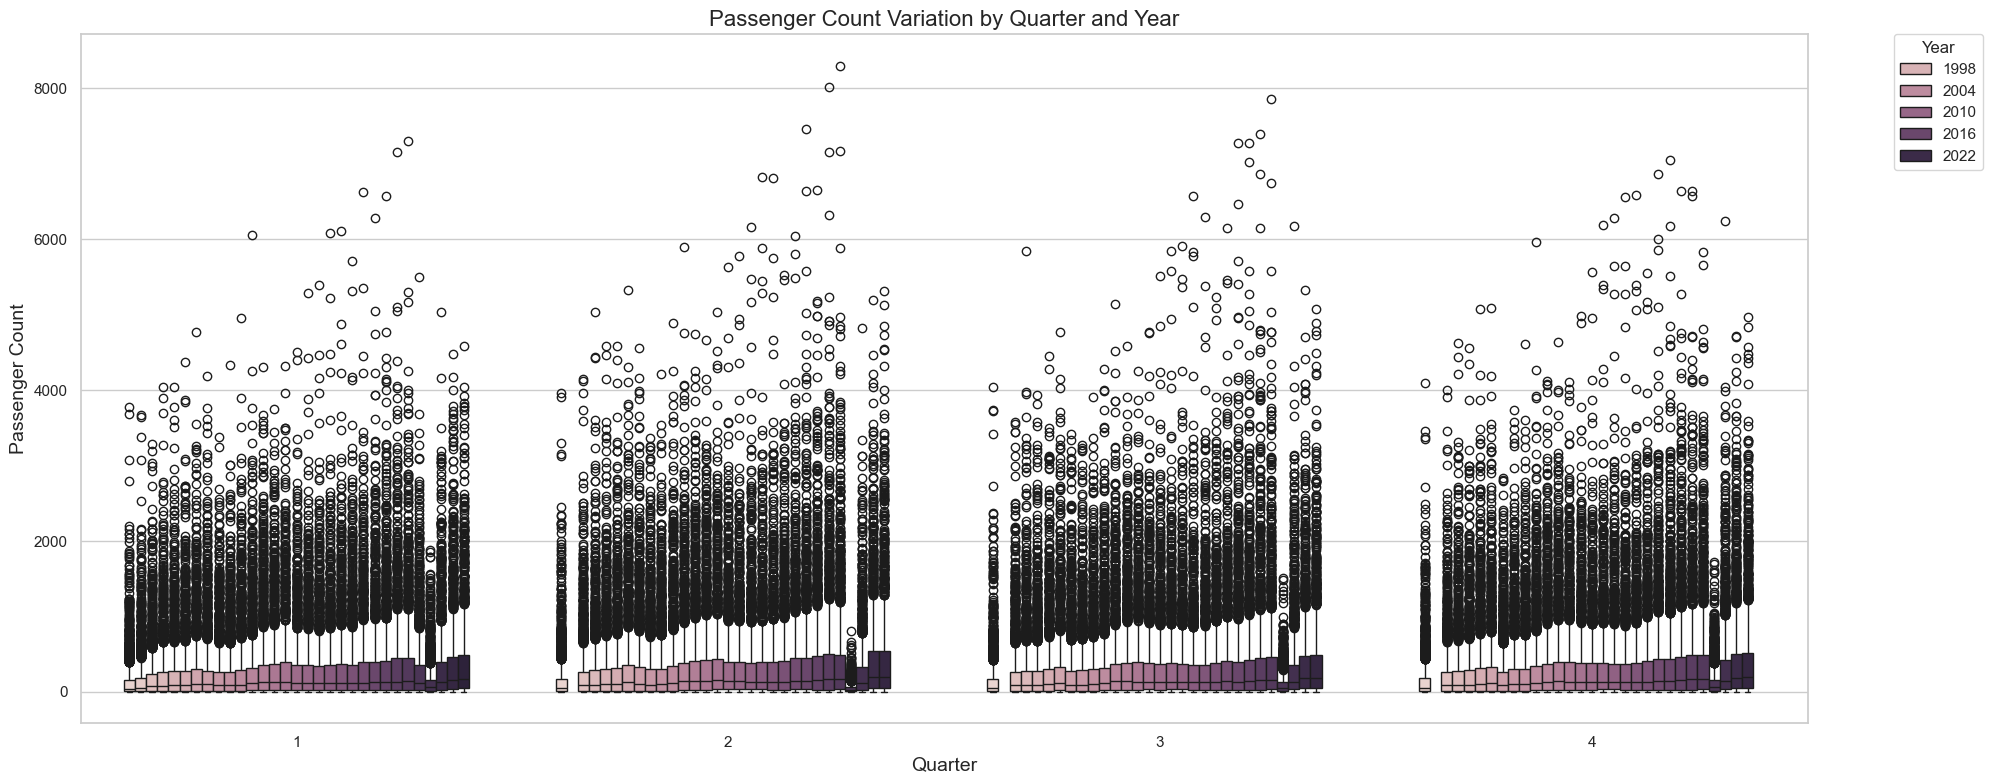

In [297]:
# How does the passenger count vary by quarter and year?
# Create the box plot
plt.figure(figsize=(20, 8))
sns.boxplot(x='quarter', y='passengers', hue='Year', data=data_no_outliers)
plt.title('Passenger Count Variation by Quarter and Year', fontsize=16)
plt.xlabel('Quarter', fontsize=14)
plt.ylabel('Passenger Count', fontsize=14)
plt.legend(title='Year', bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.tight_layout()
plt.show()

    airport_code  passengers
109          LAX     8028275
149          ORD     7215984
114          LGA     5660521
27           BOS     5493449
54           DFW     5260982
189          SFO     5181002
64           EWR     4976984
160          PHX     4283569
69           FLL     4197572
32           BWI     3849094


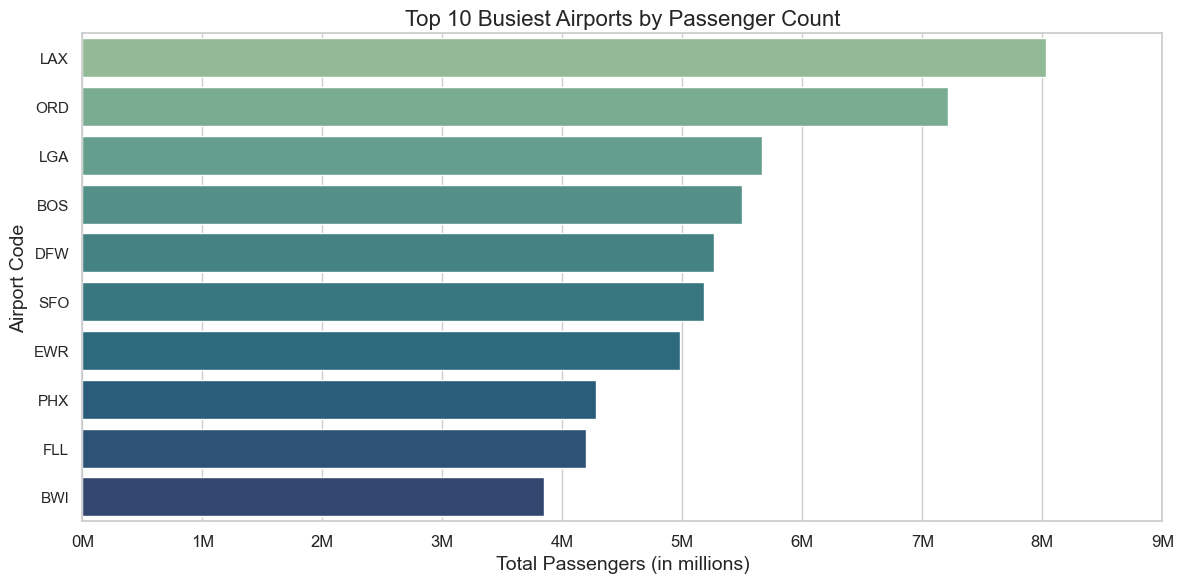

In [299]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Melt the DataFrame to have a single column for airports
melted_data = data_no_outliers.melt(id_vars=['passengers'], value_vars=['airport_1', 'airport_2'], 
                                      var_name='airport_type', value_name='airport_code')

# Group by airport and sum passenger counts
busiest_airports = melted_data.groupby('airport_code')['passengers'].sum().reset_index()

# Sort the results in descending order
busiest_airports = busiest_airports.sort_values(by='passengers', ascending=False)

# Display the top N busiest airports (e.g., top 10)
top_busiest_airports = busiest_airports.head(10)
print(top_busiest_airports)

# Create a bar plot for the busiest airports
plt.figure(figsize=(12, 6))
sns.barplot(x='passengers', y='airport_code', data=top_busiest_airports, palette='crest')
plt.title('Top 10 Busiest Airports by Passenger Count', fontsize=16)
plt.xlabel('Total Passengers (in millions)', fontsize=14)
plt.ylabel('Airport Code', fontsize=14)

# Format the x-axis to show numbers in millions
plt.xticks(ticks=plt.xticks()[0], labels=[f'{int(x / 1_000_000)}M' for x in plt.xticks()[0]], fontsize=12)

plt.tight_layout()
plt.show()



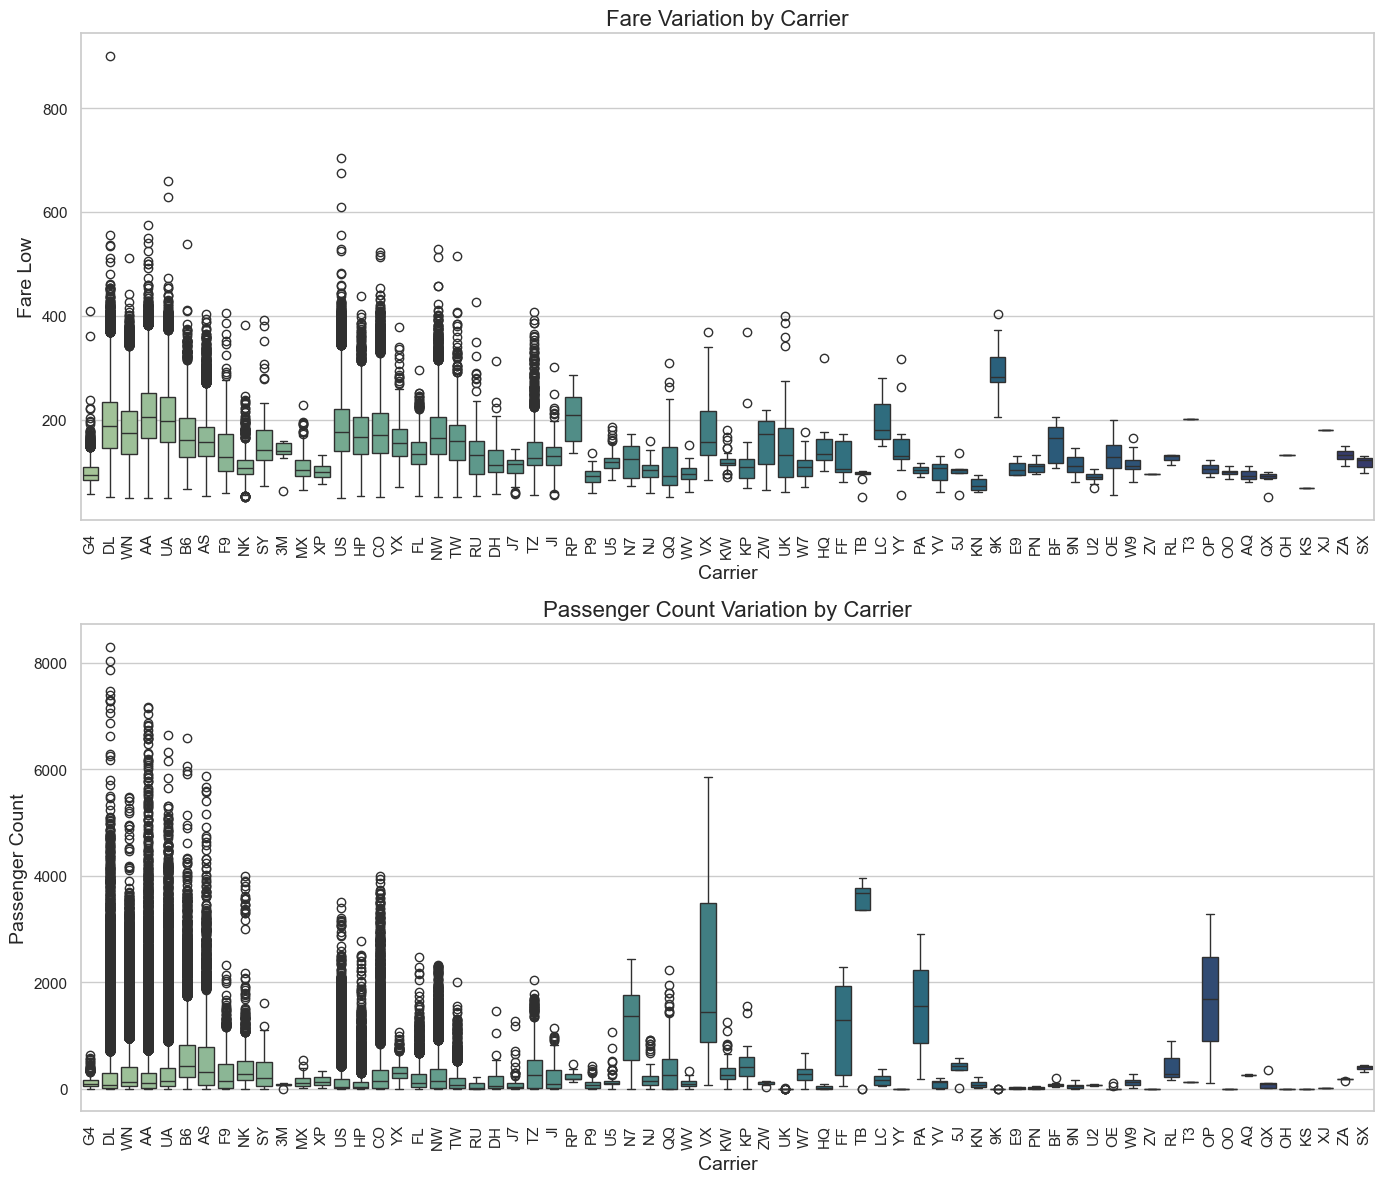

In [301]:
# How do fare and passenger counts vary across different carrier_lg?
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming data_no_outliers is already defined

# Set the style for seaborn
sns.set(style="whitegrid")

# Create a figure with subplots for fare and passenger counts
fig, axes = plt.subplots(2, 1, figsize=(14, 12))

# Box plot for fare by carrier
sns.boxplot(x='carrier_lg', y='fare_low', data=data_no_outliers, ax=axes[0], palette='crest')
axes[0].set_title('Fare Variation by Carrier', fontsize=16)
axes[0].set_xlabel('Carrier', fontsize=14)
axes[0].set_ylabel('Fare Low', fontsize=14)
axes[0].tick_params(axis='x', rotation=90)  # Rotate x-axis labels to vertical

# Box plot for passenger counts by carrier
sns.boxplot(x='carrier_lg', y='passengers', data=data_no_outliers, ax=axes[1], palette='crest')
axes[1].set_title('Passenger Count Variation by Carrier', fontsize=16)
axes[1].set_xlabel('Carrier', fontsize=14)
axes[1].set_ylabel('Passenger Count', fontsize=14)
axes[1].tick_params(axis='x', rotation=90)  # Rotate x-axis labels to vertical

# Adjust layout
plt.tight_layout()
plt.show()


City with the most routes:
city1          Los Angeles, CA (Metropolitan Area)
route_count                                  25051
Name: 0, dtype: object


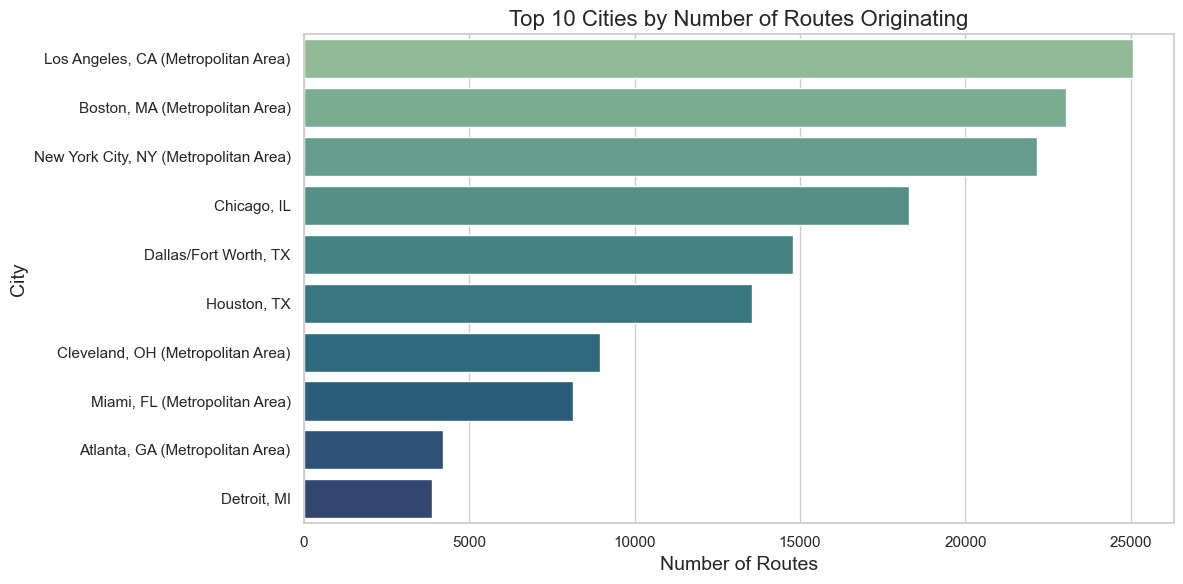

In [303]:
# Which city1 has the most routes originating from it?
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming data_no_outliers is already defined

# Count the number of routes for each city1
route_counts = data_no_outliers['city1'].value_counts().reset_index()

# Rename the columns for clarity
route_counts.columns = ['city1', 'route_count']

# Identify the city with the most routes
most_routes_city = route_counts.loc[route_counts['route_count'].idxmax()]

print("City with the most routes:")
print(most_routes_city)

# Create a bar plot for the route counts
plt.figure(figsize=(12, 6))
sns.barplot(x='route_count', y='city1', data=route_counts.head(10), palette='crest')
plt.title('Top 10 Cities by Number of Routes Originating', fontsize=16)
plt.xlabel('Number of Routes', fontsize=14)
plt.ylabel('City', fontsize=14)

# Show the plot
plt.tight_layout()
plt.show()


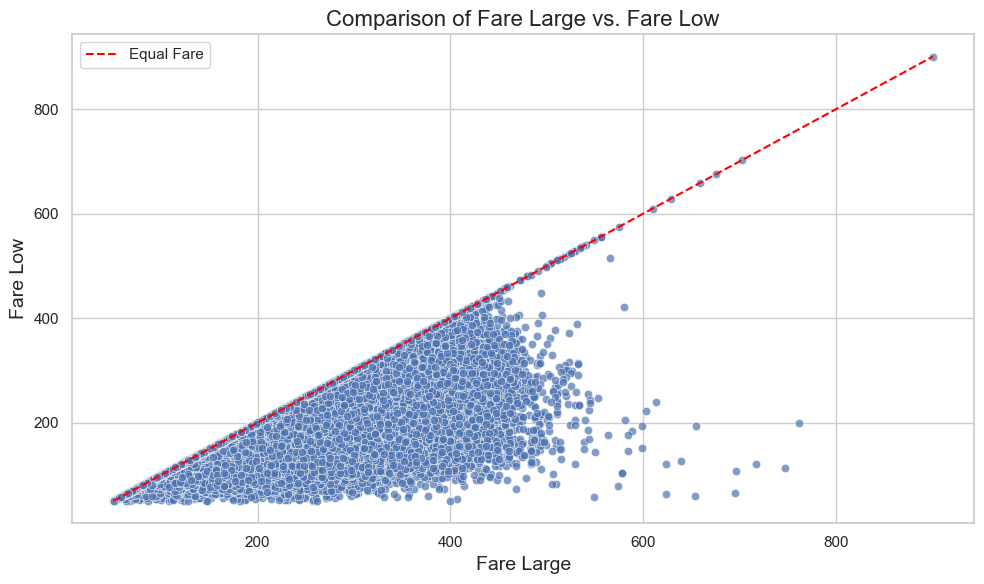

In [305]:
# Comparison of Fare_lg and Fare_low
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Create a scatter plot comparing fare_lg and fare_low
plt.figure(figsize=(10, 6))
sns.scatterplot(x='fare_lg', y='fare_low', data=data_no_outliers, alpha=0.7)

# Add a diagonal line for reference
plt.plot([data_no_outliers['fare_lg'].min(), data_no_outliers['fare_lg'].max()],
         [data_no_outliers['fare_lg'].min(), data_no_outliers['fare_lg'].max()],
         color='red', linestyle='--', label='Equal Fare')

# Add titles and labels
plt.title('Comparison of Fare Large vs. Fare Low', fontsize=16)
plt.xlabel('Fare Large', fontsize=14)
plt.ylabel('Fare Low', fontsize=14)
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()


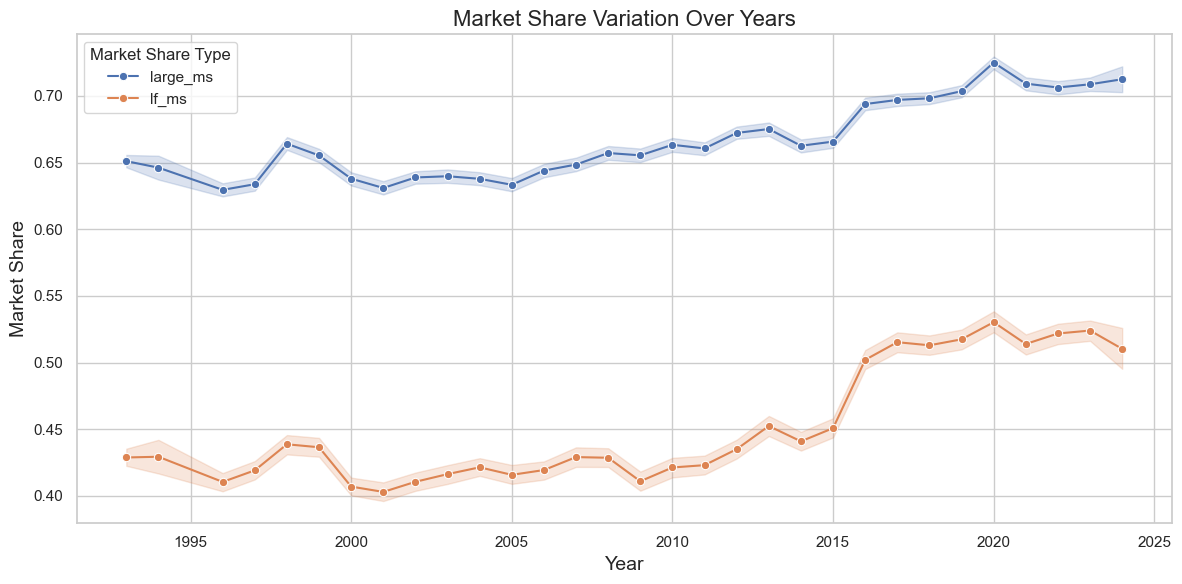

In [307]:
# How does market share (large_ms vs lf_ms) vary across different year?
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming data_no_outliers is already defined

# Melt the DataFrame to have a single column for market shares
melted_data = data_no_outliers.melt(id_vars='Year', value_vars=['large_ms', 'lf_ms'],
                                      var_name='market_share_type', value_name='market_share')

# Create a line plot to compare market shares over the years
plt.figure(figsize=(12, 6))
sns.lineplot(data=melted_data, x='Year', y='market_share', hue='market_share_type', marker='o')

# Add titles and labels
plt.title('Market Share Variation Over Years', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Market Share', fontsize=14)
plt.legend(title='Market Share Type')

# Show the plot
plt.tight_layout()
plt.show()


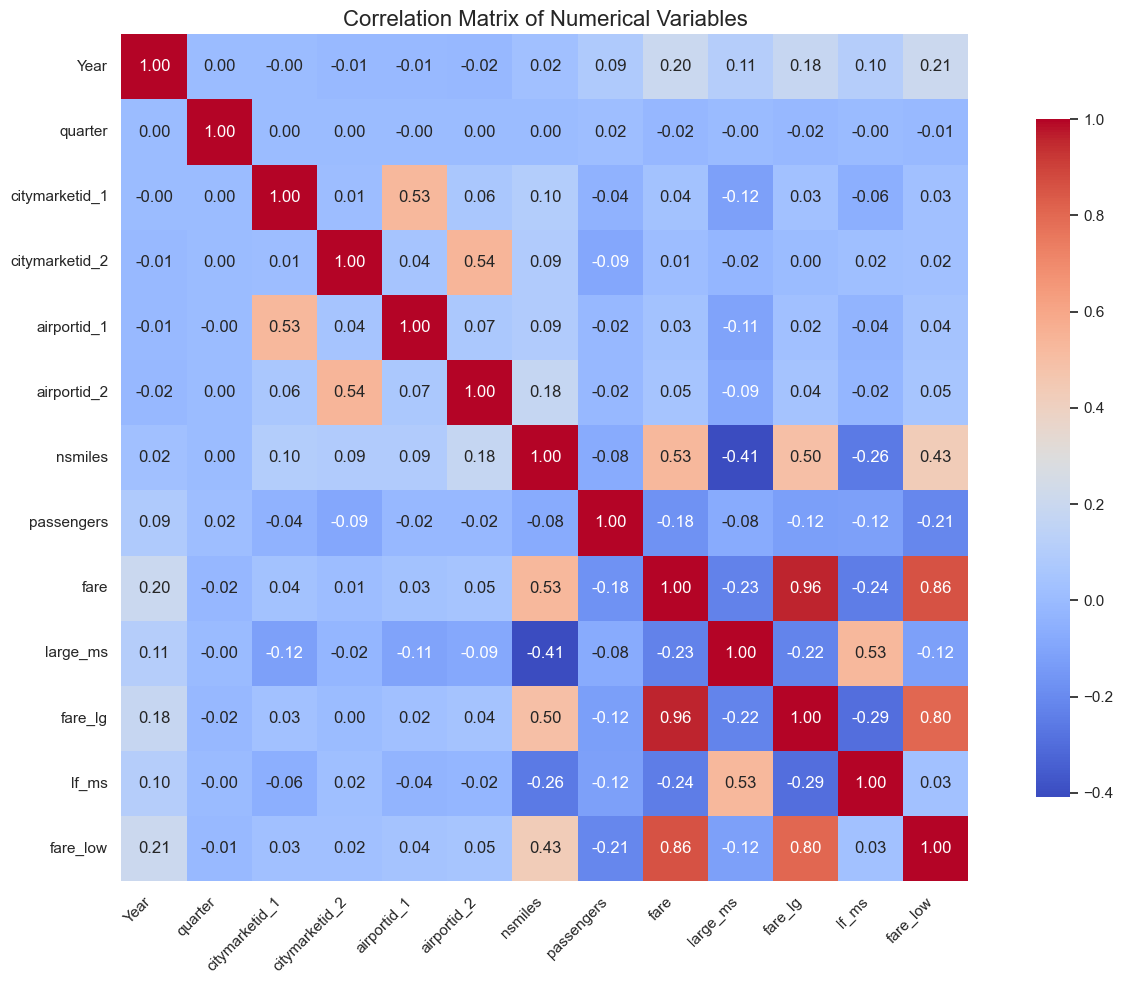

In [309]:
# Create correlation matrix
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Select only numeric columns
numeric_data = data_no_outliers.select_dtypes(include=['float64', 'int64'])

# Calculate the correlation matrix
correlation_matrix = numeric_data.corr()

# Set up the matplotlib figure
plt.figure(figsize=(14, 10))

# Create a heatmap
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar_kws={"shrink": .8})

# Add titles and labels
plt.title('Correlation Matrix of Numerical Variables', fontsize=16)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)

# Show the plot
plt.tight_layout()
plt.show()



### Conduct a regression analysis on either one dependent and one explanatory variable, or multiple explanatory variables (Chapter 10 & 11).

                            OLS Regression Results                            
Dep. Variable:               fare_low   R-squared:                       0.170
Model:                            OLS   Adj. R-squared:                  0.170
Method:                 Least Squares   F-statistic:                 4.350e+04
Date:                Fri, 15 Nov 2024   Prob (F-statistic):               0.00
Time:                        16:37:09   Log-Likelihood:            -1.1529e+06
No. Observations:              212576   AIC:                         2.306e+06
Df Residuals:                  212574   BIC:                         2.306e+06
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        145.4907      0.234    621.780      0.0

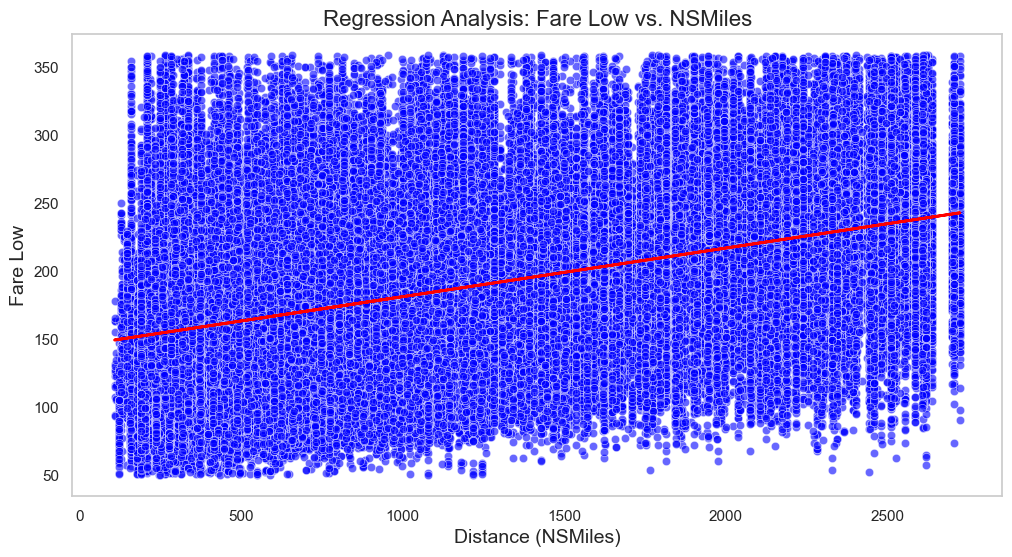

In [113]:
# Single Regression Analysis
import pandas as pd
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt

# Clean the data by dropping NaN values
data_cleaned = data_no_outliers[['fare_low', 'nsmiles']].dropna()

# Prepare the data for regression
X = data_cleaned['nsmiles']  # Independent variable
y = data_cleaned['fare_low']  # Dependent variable

# Add a constant to the independent variable (required for statsmodels)
X = sm.add_constant(X)

# Fit the regression model
model = sm.OLS(y, X).fit()

# Print the regression summary
print(model.summary())

# Visualize the regression line
plt.figure(figsize=(12, 6))
sns.scatterplot(x='nsmiles', y='fare_low', data=data_cleaned, color='blue', alpha=0.6)
plt.plot(data_cleaned['nsmiles'], model.predict(X), color='red', linewidth=2)
plt.title('Regression Analysis: Fare Low vs. NSMiles', fontsize=16)
plt.xlabel('Distance (NSMiles)', fontsize=14)
plt.ylabel('Fare Low', fontsize=14)
plt.grid()
plt.show()


### What variables impact average fare?

Checking for NaN values:
nsmiles       0
passengers    0
Year          0
fare          0
fare_lg       0
dtype: int64
0
                            OLS Regression Results                            
Dep. Variable:               fare_low   R-squared:                       0.750
Model:                            OLS   Adj. R-squared:                  0.750
Method:                 Least Squares   F-statistic:                 1.276e+05
Date:                Fri, 15 Nov 2024   Prob (F-statistic):               0.00
Time:                        16:37:17   Log-Likelihood:            -1.0252e+06
No. Observations:              212576   AIC:                         2.050e+06
Df Residuals:                  212570   BIC:                         2.051e+06
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------

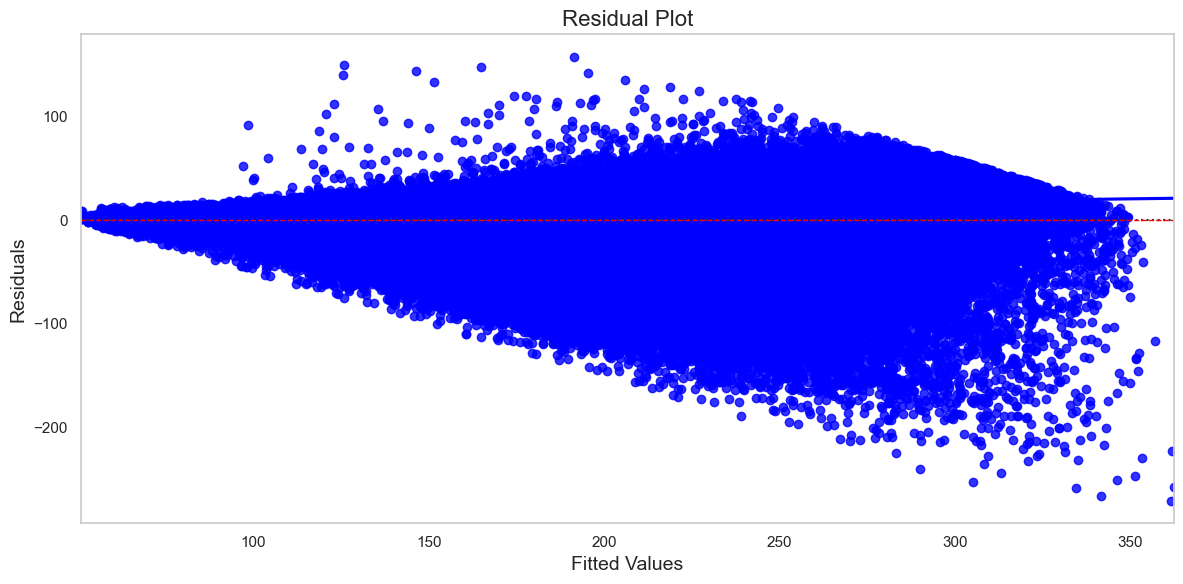

In [116]:
# Multiple Regression Model - Adding in fare_lg to regression model USE THIS ONE

import pandas as pd
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'data_no_outliers' is your DataFrame
# Select the relevant columns
X = data_no_outliers[['nsmiles', 'passengers', 'Year', 'fare', 'fare_lg']]
y = data_no_outliers['fare_low']

# Check for NaN values in X and y
print("Checking for NaN values:")
print(X.isnull().sum())
print(y.isnull().sum())

# Drop rows with NaN values in any of the selected columns
data_cleaned = data_no_outliers.dropna(subset=['nsmiles', 'passengers', 'Year', 'fare', 'fare_lg', 'fare_low'])

# Redefine X and y after dropping NaNs
X = data_cleaned[['nsmiles', 'passengers', 'Year', 'fare', 'fare_lg']]
y = data_cleaned['fare_low']

# Add a constant to the independent variables
X = sm.add_constant(X)

# Fit the regression model
model = sm.OLS(y, X).fit()

# Print the summary of the regression
print(model.summary())

# Visualize the residuals
plt.figure(figsize=(12, 6))
sns.residplot(x=model.fittedvalues, y=model.resid, lowess=True, color='blue')
plt.axhline(0, linestyle='--', color='red', linewidth=1)
plt.title('Residual Plot', fontsize=16)
plt.xlabel('Fitted Values', fontsize=14)
plt.ylabel('Residuals', fontsize=14)
plt.grid()

# Show the residual plot
plt.tight_layout()
plt.show()


### Analysis
##### An R-squared value of 0.750 means that approximately 75% of the variability in the dependent variable (in this case, fare_low) can be explained by the independent variables included in your regression model (nsmiles, passengers, Year, fare, and fare_lg).
##### All P-values are 0.000, indicating that each independent variable is statistically significant at common significance levels (e.g., 0.05). This means there's strong evidence to reject the null hypothesis for each variable, indicating that they do contribute to the model.
##### Confidence Intervals: These intervals provide a range within which we can be 95% confident that the true parameter lies. For instance, for nsmiles, the interval is [-0.003, -0.003], suggesting strong confidence in the negative impact of miles on fares.
##### The model indicates that nsmiles and passengers are negatively correlated with fare_low, while Year and fare are positively correlated. The statistically significant results suggest that these relationships are unlikely to be due to random chance. 